# 正离子处理
## 1，5，12 小时

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from brokenaxes import brokenaxes

In [2]:
pos =pd.read_excel(r'G:\新建文件夹\挥发性实验质谱数据表\pos_tuofu_second.xlsx',sheetname='Sheet1')
pos_RTlist=pd.read_excel(r'G:\新建文件夹\挥发性实验质谱数据表\pos_tuofu_second.xlsx',sheetname='Sheet2')
pos.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,id,Name,Trace,RT,Area,Response,RH_Time
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1


In [3]:
pos_RTlist.head()

,RH_Time,RH_Time_new
0,1,8012
1,2,4012
2,3,12
3,4,805
4,5,405


In [4]:
#读取数据
pos =pd.read_excel(r'G:\新建文件夹\挥发性实验质谱数据表\pos_tuofu_first.xlsx',sheetname='Sheet1')
# pos_RTlist=pd.read_excel(r'G:\新建文件夹\挥发性实验质谱数据表\pos_tuofu_second.xlsx',sheetname='Sheet2')
# post_sub=pd.read_excel('H:\脱附实验\工作簿2胡明豪.xlsx')
# print(pos_main.shape,pos_RTlist.shape,post_sub.shape)
#由于这次编号错误，需要重新编号
# pos = pd.merge(pos,pos_RTlist,how='left',on = 'RH_Time')
pos['type']=pos.Trace.apply(lambda x: 'Dimer' if x>=269 else 'Monomer')
# df2=pd.DataFrame({'RH_Time_new':[3,5,1,12,403,401,405,4012,803,801,805,8012,0],'RH':[0,0,0,0,40,40,40,40,80,80,80,80,0],'Time':[3,5,1,12,3,1,5,12,3,1,5,12,0]})
df2=pd.DataFrame({'RH_Time':[5,1,12,401,405,4012,801,805,8012,0],'RH':[0,0,0,40,40,40,80,80,80,0],'Time':[5,1,12,1,5,12,1,5,12,0]})
pos = pd.merge(pos,df2,how='left',on = 'RH_Time')
#以每组C17H26O8Na含量为基准，标准化每组数据
guiyihua=pos[pos['Name']=='C16H22O4Na'][['RH_Time','Area']]
pos = pd.merge(pos,guiyihua,how='left',on = 'RH_Time')
pos['Nol_Response']=pos['Area_x']/pos['Area_y']
#取干态条件为对比数据
duizao=pos[pos['RH_Time']==0]['Nol_Response']
duizao_data=list(duizao)*10
pos['对照实验']=duizao_data
pos['变化比例']=(pos['Nol_Response']-pos['对照实验'])/pos['对照实验']
pos.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,id,Name,Trace,RT,Area_x,Response,RH_Time,type,RH,Time,Area_y,Nol_Response,对照实验,变化比例
0,1,C10H16O3Na-1,207.0997,7.23,124915.656,124915.656,0,Monomer,0,0,962868.688,0.129733,0.129733,0.0
1,2,C10H16O3Na-2,207.0997,9.55,2403.975,2403.975,0,Monomer,0,0,962868.688,0.002497,0.002497,0.0
2,3,C10H16O4Na-1,223.0946,5.62,90454.133,90454.133,0,Monomer,0,0,962868.688,0.093942,0.093942,0.0
3,4,C10H16O4Na-2,223.0946,5.85,22263.777,22263.777,0,Monomer,0,0,962868.688,0.023122,0.023122,0.0
4,5,C10H16O4Na-3,223.0946,8.13,16465.617,16465.617,0,Monomer,0,0,962868.688,0.017101,0.017101,0.0


In [5]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4060 entries, 0 to 4059
Data columns (total 14 columns):
id              4060 non-null int64
Name            4060 non-null object
Trace           4010 non-null float64
RT              4004 non-null float64
Area_x          4004 non-null float64
Response        4004 non-null float64
RH_Time         4060 non-null int64
type            4060 non-null object
RH              4060 non-null int64
Time            4060 non-null int64
Area_y          4060 non-null float64
Nol_Response    4004 non-null float64
对照实验            4010 non-null float64
变化比例            4004 non-null float64
dtypes: float64(8), int64(4), object(2)
memory usage: 475.8+ KB


In [6]:
norm_list=['Area_y','Nol_Response','对照实验','变化比例']
norm_data=pos_data.drop(norm_list,axis=1)
# sum_lis=norm_data.groupby('RH_Time')['Area_x'].sum()

NameError: name 'pos_data' is not defined

In [81]:
norm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6591 entries, 0 to 9021
Data columns (total 11 columns):
id             6591 non-null int64
Name           6591 non-null object
Trace          6591 non-null float64
RT             6590 non-null float64
Area_x         6590 non-null float64
Response       6590 non-null float64
RH_Time        6591 non-null int64
RH_Time_new    6591 non-null int64
type           6591 non-null object
RH             6591 non-null int64
Time           6591 non-null int64
dtypes: float64(4), int64(5), object(2)
memory usage: 937.9+ KB


In [82]:
sum_lis=norm_data.groupby('RH_Time')['Area_x'].sum()


RH_Time
1     2.426199e+07
2     2.255194e+07
3     2.194022e+07
4     1.959733e+07
5     2.174580e+07
6     1.933161e+07
7     1.572271e+07
8     1.979299e+07
9     1.476567e+07
10    2.011631e+07
11    1.941797e+07
12    1.820721e+07
13    1.781564e+07
Name: Area_x, dtype: float64

In [88]:
# df_sum=pd.DataFrame({'总信号':sum_lis})
# df_sum=pd.DataFrame(sum_lis)
# df_sum=df_sum.reset_index()
norm_data=pd.merge(norm_data,df_sum,on='RH_Time')
norm_data.head()

,id,Name,Trace,RT,Area_x_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_x_y
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12,2.426199e+07
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12,2.426199e+07
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12,2.426199e+07
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12,2.426199e+07
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12,2.426199e+07


In [89]:
norm_data['总信号占比']=norm_data['Area_x_x']/norm_data['Area_x_y']
norm_data.tail()

,id,Name,Trace,RT,Area_x_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_x_y,总信号占比
6586,687,C10H15O4-3,199.0970,6.33,4864.710,4864.710,13,0,Monomer,0,0,1.781564e+07,0.000273
6587,688,C10H15O4-2,199.0970,5.56,2908.022,2908.022,13,0,Monomer,0,0,1.781564e+07,0.000163
6588,689,C10H15O4-1,199.0970,4.93,2155.725,2155.725,13,0,Monomer,0,0,1.781564e+07,0.000121
6589,690,C19H32O8Na-1,411.1995,8.28,2171.346,2171.346,13,0,Dimer,0,0,1.781564e+07,0.000122
6590,694,C19H32O9Na,427.1944,9.45,26919.740,26919.740,13,0,Dimer,0,0,1.781564e+07,0.001511


In [90]:
#取干态条件为对比数据
duizao=norm_data[norm_data['RH_Time_new']==0]['总信号占比']
duizao_data=list(duizao)*13
norm_data['对照实验']=duizao_data
norm_data['变化比例']=(norm_data['总信号占比']-norm_data['对照实验'])/norm_data['对照实验']
norm_data.head()

,id,Name,Trace,RT,Area_x_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_x_y,总信号占比,对照实验,变化比例
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12,2.426199e+07,0.000029,0.000093,-0.686111
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12,2.426199e+07,0.000648,0.000339,0.912939
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12,2.426199e+07,0.000127,0.000233,-0.452910
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12,2.426199e+07,0.000060,0.000227,-0.734955
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12,2.426199e+07,0.000526,0.000312,0.682236


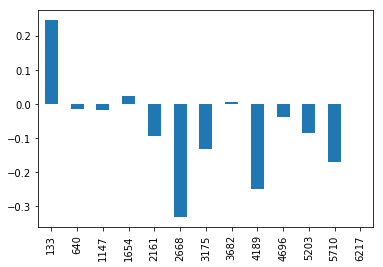

In [94]:
norm_data[norm_data['Name']=='C17H26O8Na']['变化比例'].plot(kind='bar')
plt.show()

In [7]:
posdata=pos

In [8]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4060 entries, 0 to 4059
Data columns (total 14 columns):
id              4060 non-null int64
Name            4060 non-null object
Trace           4010 non-null float64
RT              4004 non-null float64
Area_x          4004 non-null float64
Response        4004 non-null float64
RH_Time         4060 non-null int64
type            4060 non-null object
RH              4060 non-null int64
Time            4060 non-null int64
Area_y          4060 non-null float64
Nol_Response    4004 non-null float64
对照实验            4010 non-null float64
变化比例            4004 non-null float64
dtypes: float64(8), int64(4), object(2)
memory usage: 475.8+ KB


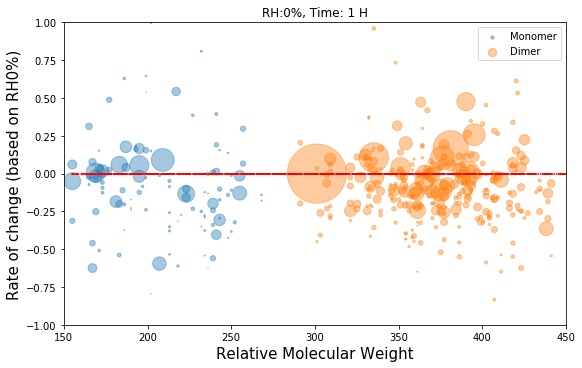

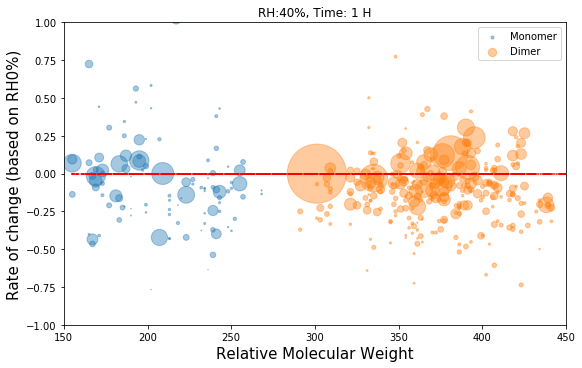

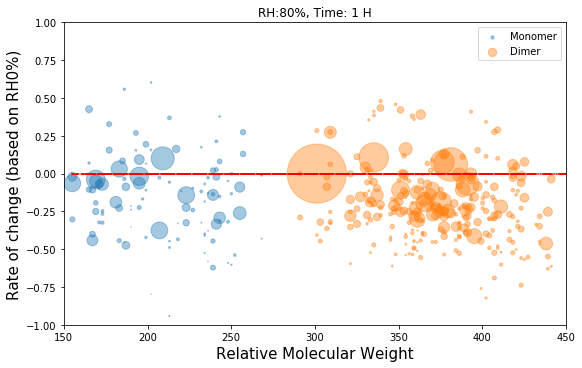

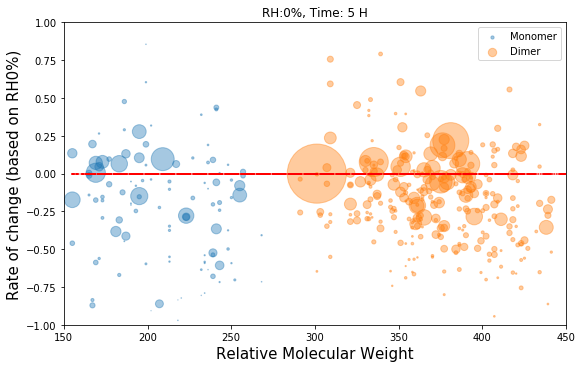

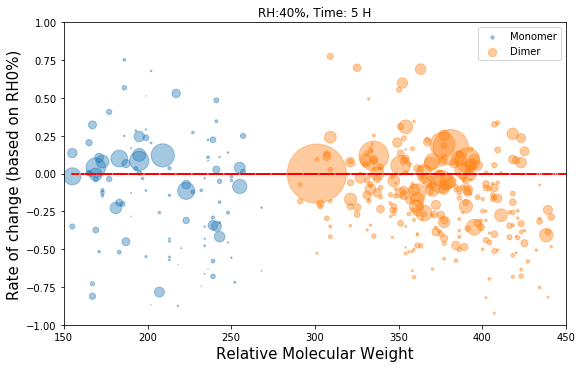

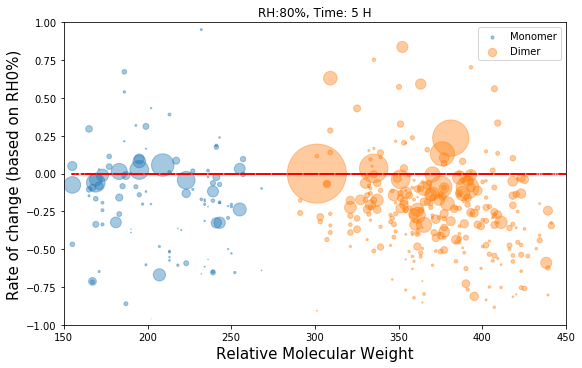

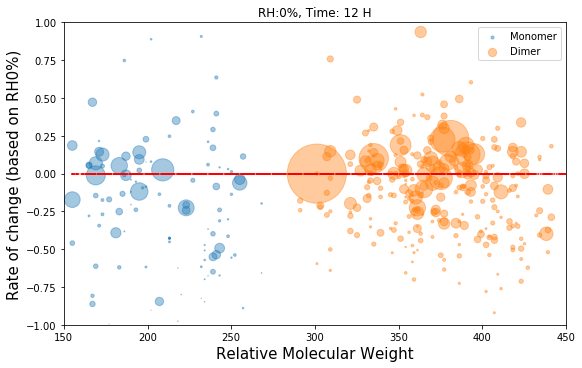

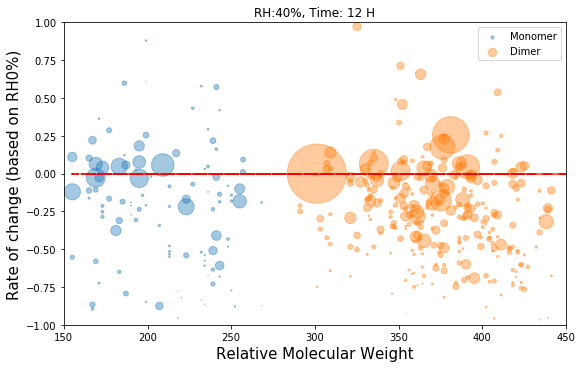

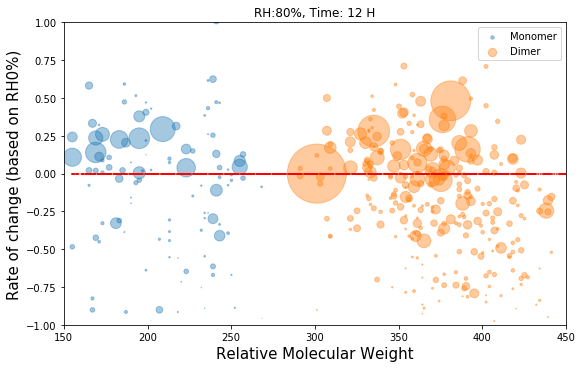

In [21]:

rh=[0,40,80]
time=[1,5,12]
for t in time:
    for RH in rh:
        a='RH:%s'%RH+'%,'+' Time: %s H'%t
        grouped=posdata[(posdata['变化比例']<=10)&(posdata['Time']==t)&(posdata['RH']==RH)]
        x1=grouped[grouped['type']=='Monomer']['Trace']
        y1=grouped[grouped['type']=='Monomer']['变化比例']
        v1=grouped[grouped['type']=='Monomer']['Nol_Response']*3500
        v1=v1.apply(lambda x: abs(x))
        x2=grouped[grouped['type']=='Dimer']['Trace']
        y2=grouped[grouped['type']=='Dimer']['变化比例']
        v2=grouped[grouped['type']=='Dimer']['Nol_Response']*3500
#         v2=v2.apply(lambda x: np.sqrt(abs(x)))
        plt.figure(figsize=(9, 5.562))
#         grid = plt.GridSpec(1, 4, wspace=0.5, hspace=0.5)
#         fig=plt.subplot(grid[0,0:2])
        plt.scatter(x=x1,y=y1,s=v1,alpha=0.4)
        plt.scatter(x=x2,y=y2,s=v2,alpha=0.4)
        plt.xlabel('Relative Molecular Weight',fontsize=15)
        plt.ylabel('Rate of change (based on RH0%)',fontsize=15)
        plt.legend(['Monomer','Dimer'],markerscale=0.2)
        plt.ylim(-1,1)
        plt.xlim(150,450)
        x=grouped['Trace']
        y1=np.zeros((len(x),1))
#         y2=np.ones((len(x),1))*-0.5
#         y3=np.ones((len(x),1))*0.5
        plt.plot(x,y1,'r-.')
        plt.title(a,fontsize=12)
#         fig=plt.subplot(grid[0,2:3])
#         check_data=grouped[abs(grouped['变化比例'])>=0.5]
#         check_data['type'].value_counts().plot(kind='pie')
#         plt.title('change ratio >= 50%')
#         grouped['changing']=grouped['变化比例'].apply(lambda x: 'Increase' if x>=0 else 'Reduce')
#         grouped_dimer=grouped[grouped['type']=='Dimer']
#         grouped_dimer['changing'].value_counts().plot(kind='bar',color=['r','b'])
#         plt.title('Dimer:Increase and Reduce')
#         fig=plt.subplot(grid[0,3:4])
#         grouped_moner=grouped[grouped['type']=='Monomer']
#         colors = ['red','lightskyblue']
#         grouped_moner['changing'].value_counts().plot(kind='bar',color=['r','b'])
#         check_data['type'].value_counts().plot(kind='pie')
#         plt.title('Monomer:Increase and Reduce')
        plt.show()

In [99]:
posdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5890 entries, 1 to 6590
Data columns (total 15 columns):
id             5890 non-null int64
Name           5890 non-null object
Trace          5890 non-null float64
RT             5890 non-null float64
Area_x_x       5890 non-null float64
Response       5890 non-null float64
RH_Time        5890 non-null int64
RH_Time_new    5890 non-null int64
type           5890 non-null object
RH             5890 non-null int64
Time           5890 non-null int64
Area_x_y       5890 non-null float64
总信号占比          5890 non-null float64
对照实验           5890 non-null float64
变化比例           5890 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 736.2+ KB


In [3]:
#去除pos_main中pos_add的数据,其中7种为原积分含有，C19H32O8Na-3为新加(对主数据进行筛选)
# contains_list=['C17H30O6Na-2','C17H30O6Na-3','C18H28O6Na-6','C18H28O6Na-7','C7H12O5Na-1','C7H12O5Na-2','C7H12O5Na-3','C19H32O8Na-3']
# str_list='|'.join(contains_list)
contains_list=post_sub[(post_sub['标记']=='空白样成分')|(post_sub['标记']=='1')]
str_list='|'.join("%s" %id for id in contains_list['未检出成分'])
#取出原数据中没检测出，但随后检测中检测出的物质
pos_data=pos_main[pos_main['id']<=229]
pos_data=pos_data[pos_data['Name'].str.contains(str_list, regex=True)==False]
pos_data.shape

(2886, 7)

In [4]:
# pos=pd.concat([pos_main,pos_add])
# pos.shape
#不能dropna，防止数据不能对齐

(4070, 9)

In [4]:
#由于这次编号错误，需要重新编号
pos = pd.merge(pos_data,pos_RTlist,how='left',on = 'RH_Time')

In [5]:
pos.head()

,id,Name,Trace,RT,Area,Response,RH_Time,RH_Time_new
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012


In [6]:
pos['type']=pos.Trace.apply(lambda x: 'Dimer' if x>=269 else 'Monomer')
df=pd.DataFrame({'RH_Time_new':[3,5,1,12,403,401,405,4012,803,801,805,8012,0],'RH':[0,0,0,0,40,40,40,40,80,80,80,80,0],'Time':[3,5,1,12,3,1,5,12,3,1,5,12,0]})
pos = pd.merge(pos,df,how='left',on = 'RH_Time_new')
pos.head()

,id,Name,Trace,RT,Area,Response,RH_Time,RH_Time_new,type,RH,Time
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12


In [7]:
guiyihua=pos[pos['Name']=='C17H26O8Na'][['RH_Time','Area']]
pos = pd.merge(pos,guiyihua,how='left',on = 'RH_Time')
pos.head()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_y
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12,987050.5
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12,987050.5
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12,987050.5
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12,987050.5
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12,987050.5


In [8]:
pos['Nol_Response']=pos['Area_x']/pos['Area_y']

In [16]:
# pos.to_excel('H:\脱附实验\正离子模式处理new_res.xlsx',index=False)

In [6]:
#将补充数据插入到它的条件中
# posdata=pos.groupby('RH_Time').apply(lambda x: x.sort_values('id'))
# posdata=pd.DataFrame(posdata)
# posdata.head()

id          Name     Trace    RT        Area    Response  \
RH_Time                                                                  
0       0      1  C10H16O3Na-1  207.0997  7.23  124915.656  124915.656   
        3990   1  C17H30O6Na-2  353.1940  9.09    1669.880    1669.880   
        1      2  C10H16O3Na-2  207.0997  9.55    2403.975    2403.975   
        3991   2  C17H30O6Na-3  353.1940  9.21    6383.839    6383.839   
        2      3  C10H16O4Na-1  223.0946  5.62   90454.133   90454.133   

              RH_Time  C17H26O8Na-2  Nol_Response     type  RH  Time  
RH_Time                                                               
0       0           0    293282.594      0.425923  Monomer   0     0  
        3990        0    293282.594      0.005694    Dimer   0     0  
        1           0    293282.594      0.008197  Monomer   0     0  
        3991        0    293282.594      0.021767    Dimer   0     0  
        2           0    293282.594      0.308420  Monomer   0     0

In [9]:
a=[193, 35, 36, 106, 204, 84, 213, 214, 215, 216, 217, 56]
pos=pos[~pos['id'].isin(a)]
pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730 entries, 0 to 2885
Data columns (total 13 columns):
id              2730 non-null int64
Name            2730 non-null object
Trace           2730 non-null float64
RT              2730 non-null float64
Area_x          2730 non-null float64
Response        2730 non-null float64
RH_Time         2730 non-null int64
RH_Time_new     2730 non-null int64
type            2730 non-null object
RH              2730 non-null int64
Time            2730 non-null int64
Area_y          2730 non-null float64
Nol_Response    2730 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 298.6+ KB


,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_y,Nol_Response


In [10]:
#取干态条件为对比数据
duizao=pos[pos['RH_Time_new']==0]['Nol_Response']
duizao_data=list(duizao)*13
pos['对照实验']=duizao_data
pos['变化比例']=(pos['Nol_Response']-pos['对照实验'])/pos['对照实验']
pos.head()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_y,Nol_Response,对照实验,变化比例
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12,987050.5,0.000718,0.002851,-0.748210
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12,987050.5,0.015932,0.010383,0.534485
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12,987050.5,0.003132,0.007137,-0.561146
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12,987050.5,0.001476,0.006942,-0.787391
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12,987050.5,0.012918,0.009573,0.349424


In [72]:
posdata=pos_data

In [12]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730 entries, 0 to 2885
Data columns (total 15 columns):
id              2730 non-null int64
Name            2730 non-null object
Trace           2730 non-null float64
RT              2730 non-null float64
Area_x          2730 non-null float64
Response        2730 non-null float64
RH_Time         2730 non-null int64
RH_Time_new     2730 non-null int64
type            2730 non-null object
RH              2730 non-null int64
Time            2730 non-null int64
Area_y          2730 non-null float64
Nol_Response    2730 non-null float64
对照实验            2730 non-null float64
变化比例            2730 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 341.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


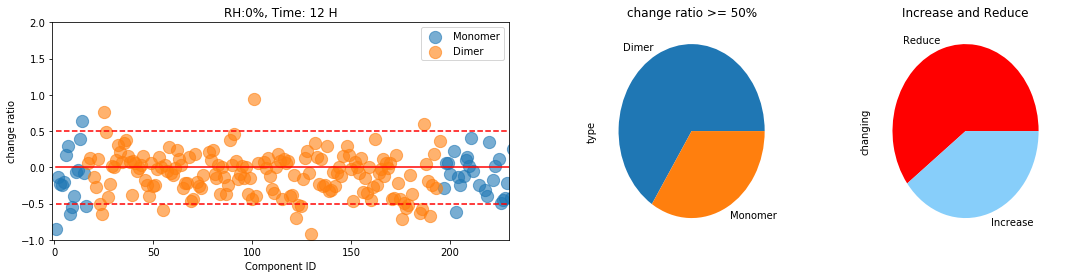

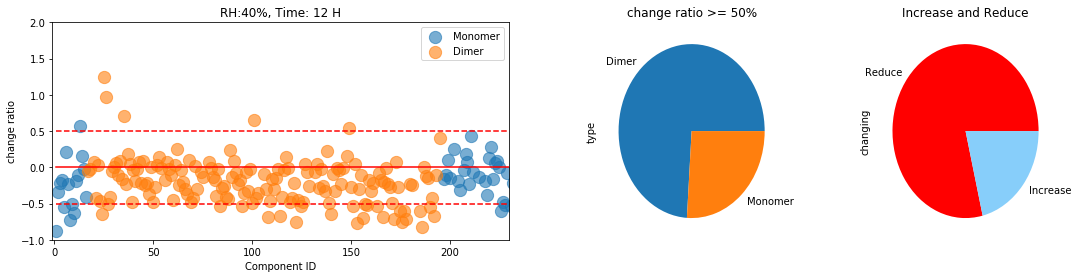

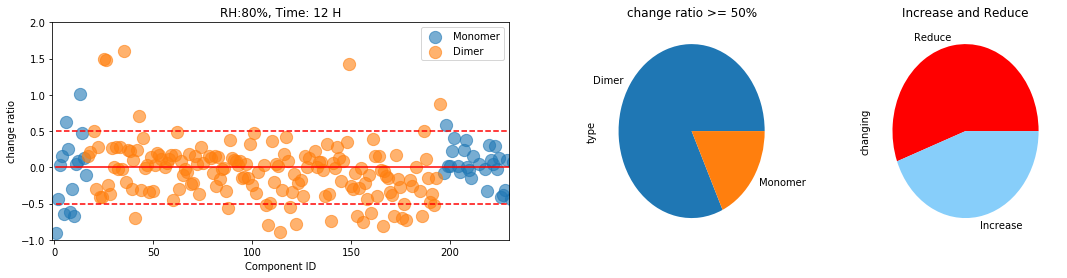

In [7]:
rh=[0,40,80]
for RH in rh:
    a='RH:%s'%RH+'%,'+' Time: 12 H'
    grouped=posdata[(posdata['变化比例']<=2)&(posdata['Time']==12)&(posdata['RH']==RH)]
    x1=grouped[grouped['type']=='Monomer']['id']
    y1=grouped[grouped['type']=='Monomer']['变化比例']
    x2=grouped[grouped['type']=='Dimer']['id']
    y2=grouped[grouped['type']=='Dimer']['变化比例']
    plt.figure(figsize=(18, 4))
    grid = plt.GridSpec(1, 4, wspace=0.5, hspace=0.5)
    fig=plt.subplot(grid[0,0:2])
    plt.scatter(x=x1,y=y1,s=150,alpha=0.6)
    plt.scatter(x=x2,y=y2,s=150,alpha=0.6)
    plt.xlabel('Component ID')
    plt.ylabel('change ratio')
    plt.legend(['Monomer','Dimer'])
    plt.ylim(-1,2)
    plt.xlim(-1,230)
    x=grouped['id']
    y1=np.zeros((len(x),1))
    y2=np.ones((len(x),1))*-0.5
    y3=np.ones((len(x),1))*0.5
    plt.plot(x,y1,'r-',x,y2,'r--',x,y3,'r--')
    plt.title(a)
    fig=plt.subplot(grid[0,2:3])
    check_data=grouped[abs(grouped['变化比例'])>=0.5]
    check_data['type'].value_counts().plot(kind='pie')
    plt.title('change ratio >= 50%')
    fig=plt.subplot(grid[0,3:4])
    grouped['changing']=grouped['变化比例'].apply(lambda x: 'Increase' if x>=0 else 'Reduce')
    colors = ['red','lightskyblue']
    grouped['changing'].value_counts().plot(kind='pie',colors=colors)
    plt.title('Increase and Reduce')
    plt.show()

In [119]:
post_sub=pd.read_excel(r'H:\脱附实验\挥发性实验质谱数据表\出峰不好或未检测到的物质胡明豪.xlsx',sheet_name='Sheet1')
contains=post_sub['未检出成分'].dropna()
contains_list=pd.DataFrame({'未检出成分':contains})
str_list='|'.join("%s" %id for id in contains_list['未检出成分'])
#取出原数据中没检测出，但随后检测中检测出的物质
# pos_data=pos_main[pos_main['id']<=229]
pos_data=pos[pos['Name'].str.contains(str_list, regex=True)==False]
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6591 entries, 0 to 9021
Data columns (total 15 columns):
id              6591 non-null int64
Name            6591 non-null object
Trace           6591 non-null float64
RT              6590 non-null float64
Area_x          6590 non-null float64
Response        6590 non-null float64
RH_Time         6591 non-null int64
RH_Time_new     6591 non-null int64
type            6591 non-null object
RH              6591 non-null int64
Time            6591 non-null int64
Area_y          6591 non-null float64
Nol_Response    6590 non-null float64
对照实验            6591 non-null float64
变化比例            6590 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 823.9+ KB


In [100]:
pos_data=posdata

In [67]:
pos_data.to_excel('H:\脱附实验\挥发性实验质谱数据表\除去检出差的物质.xlsx',index=False)

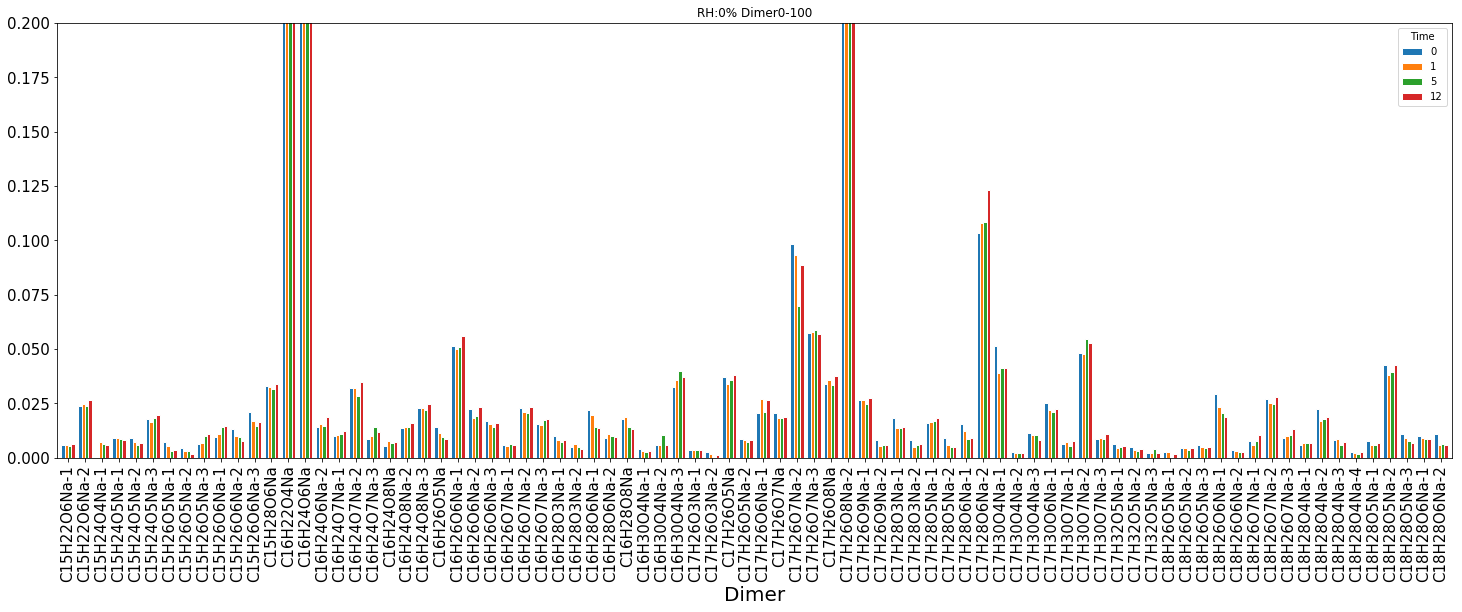

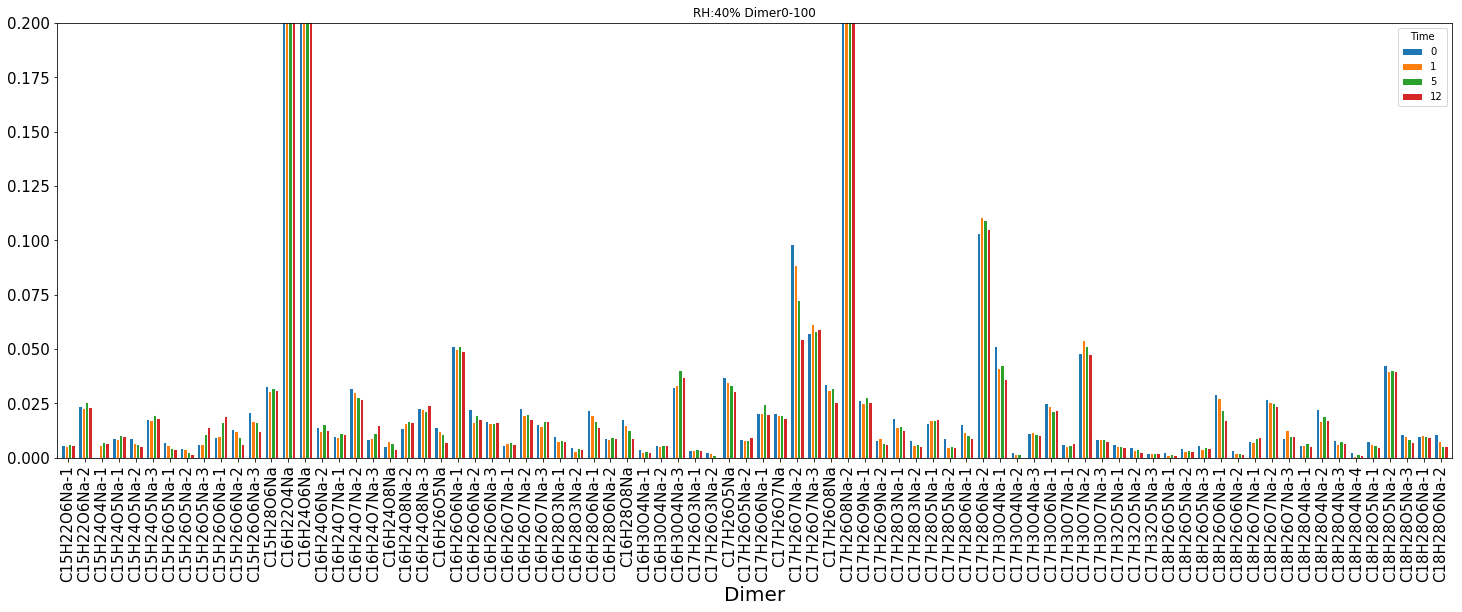

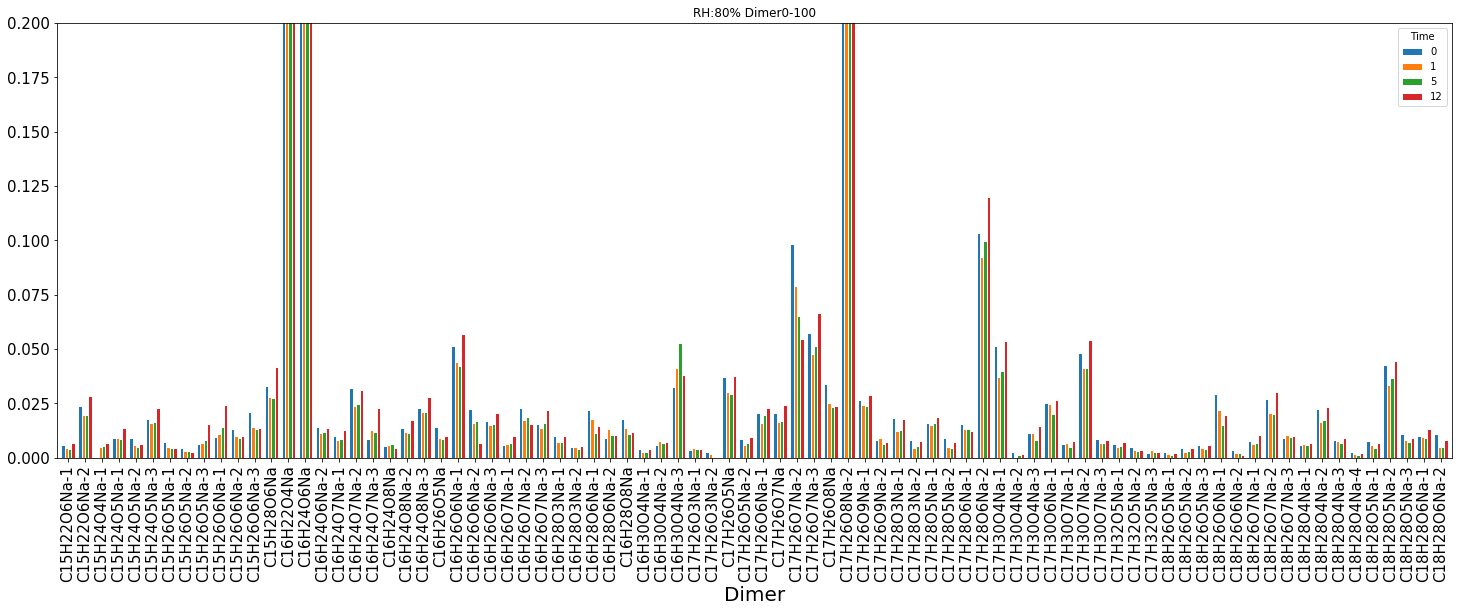

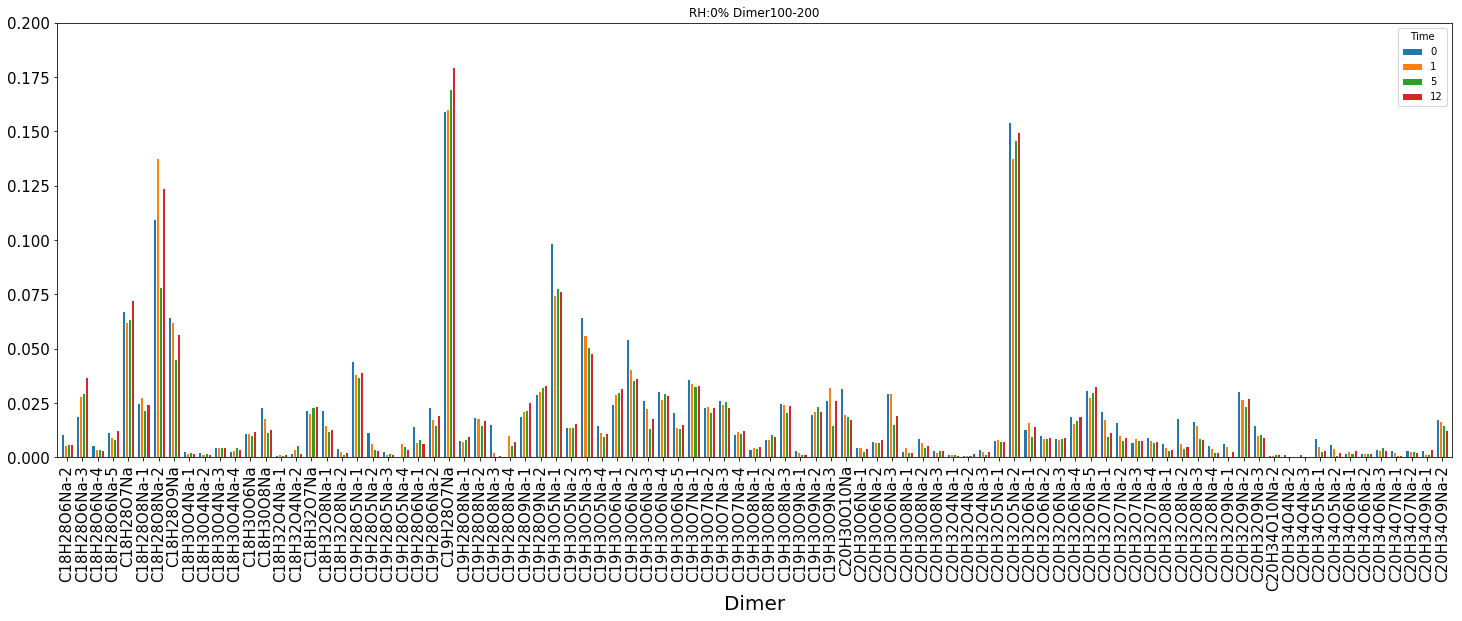

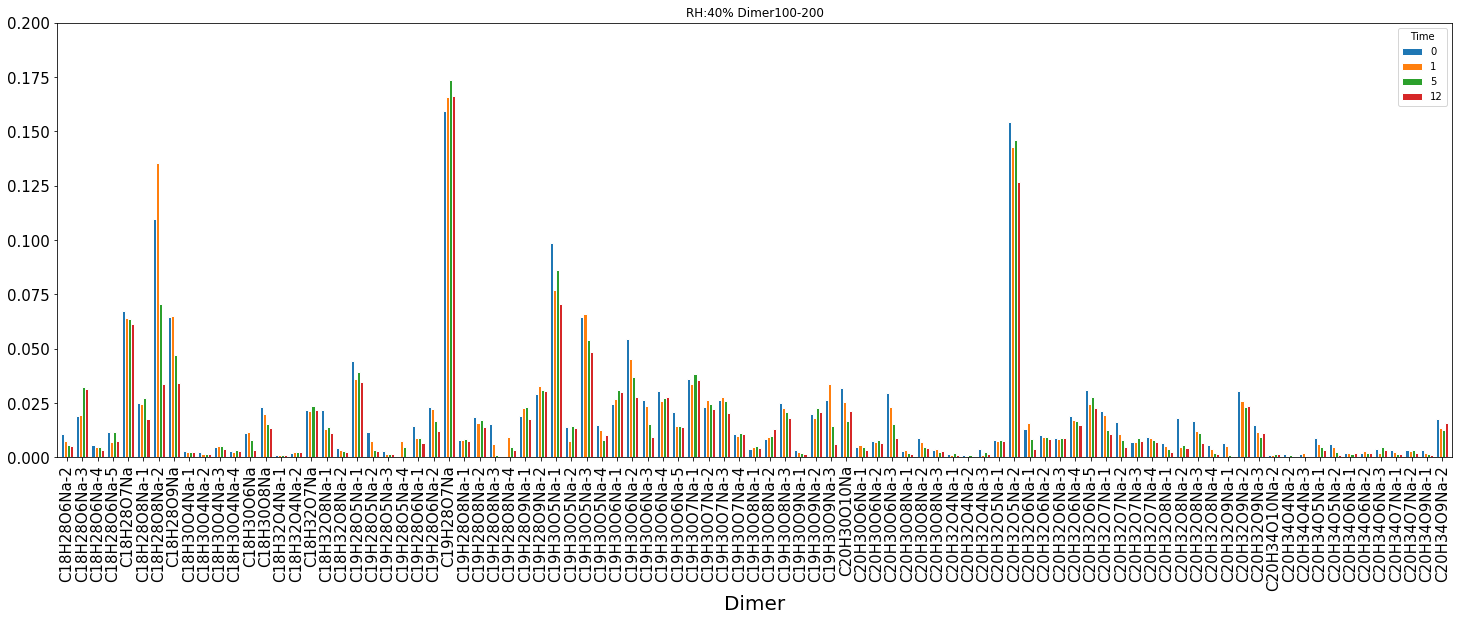

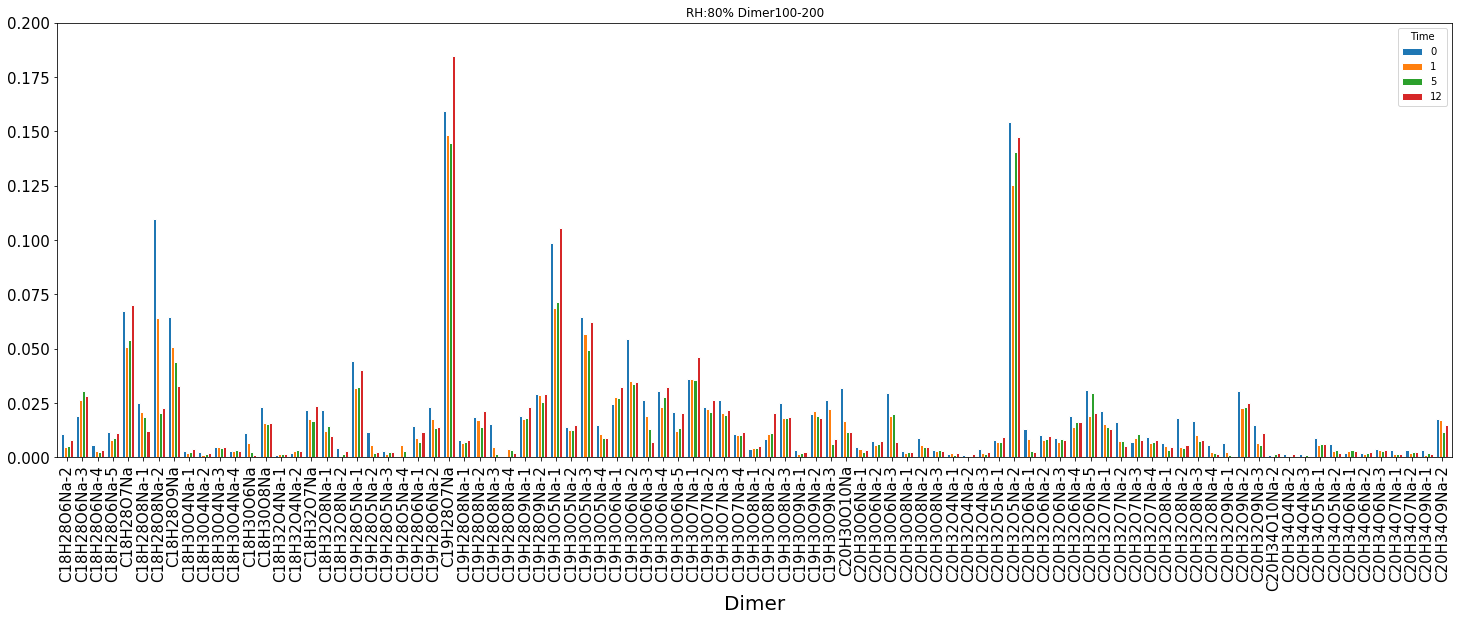

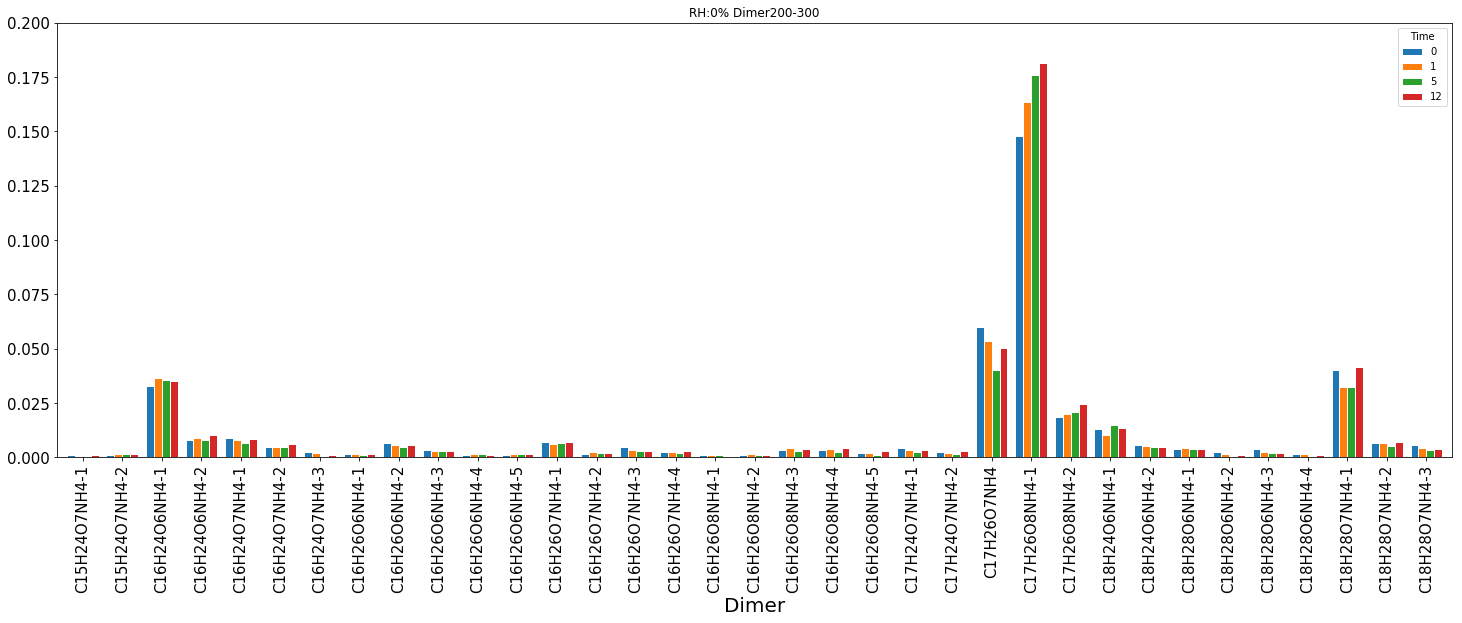

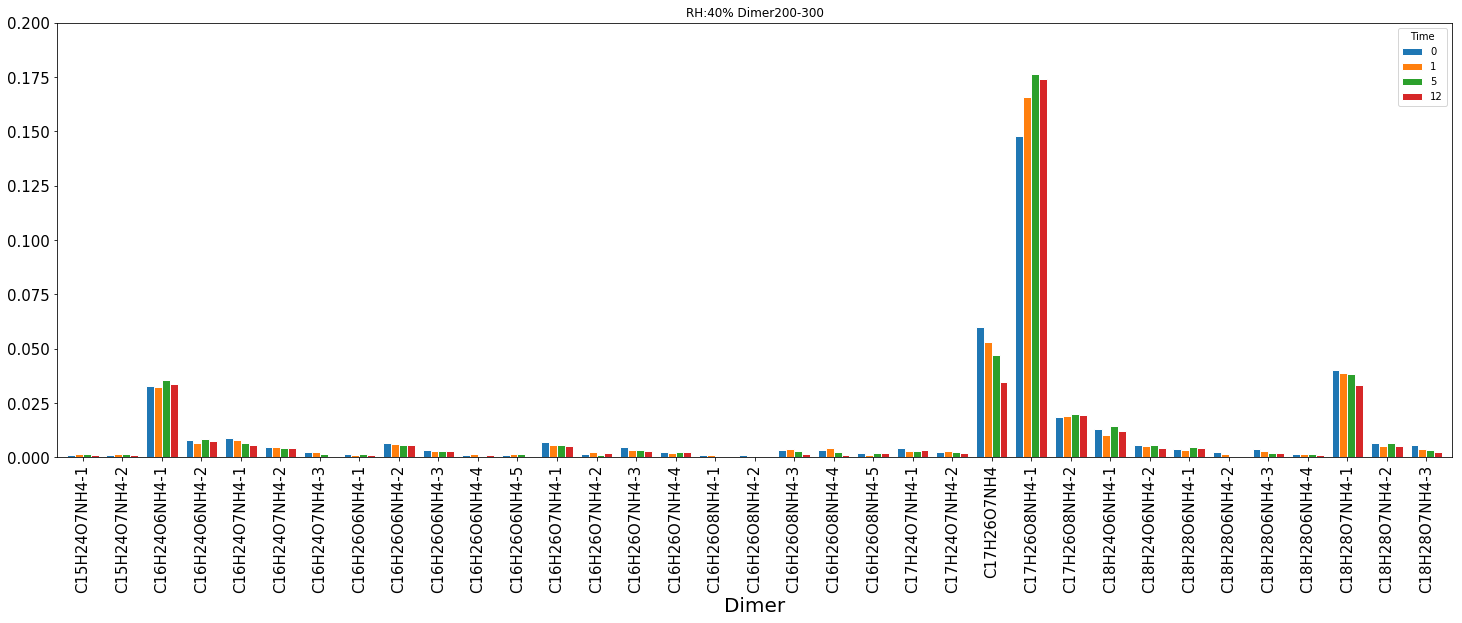

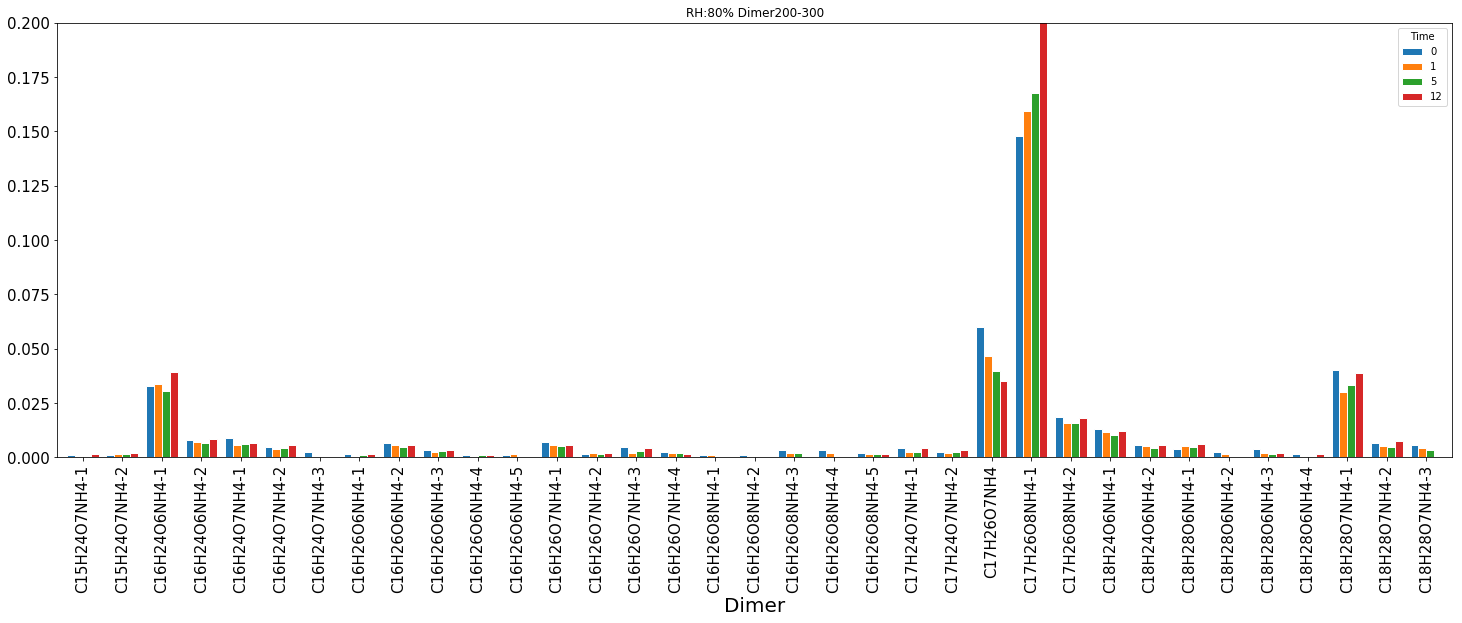

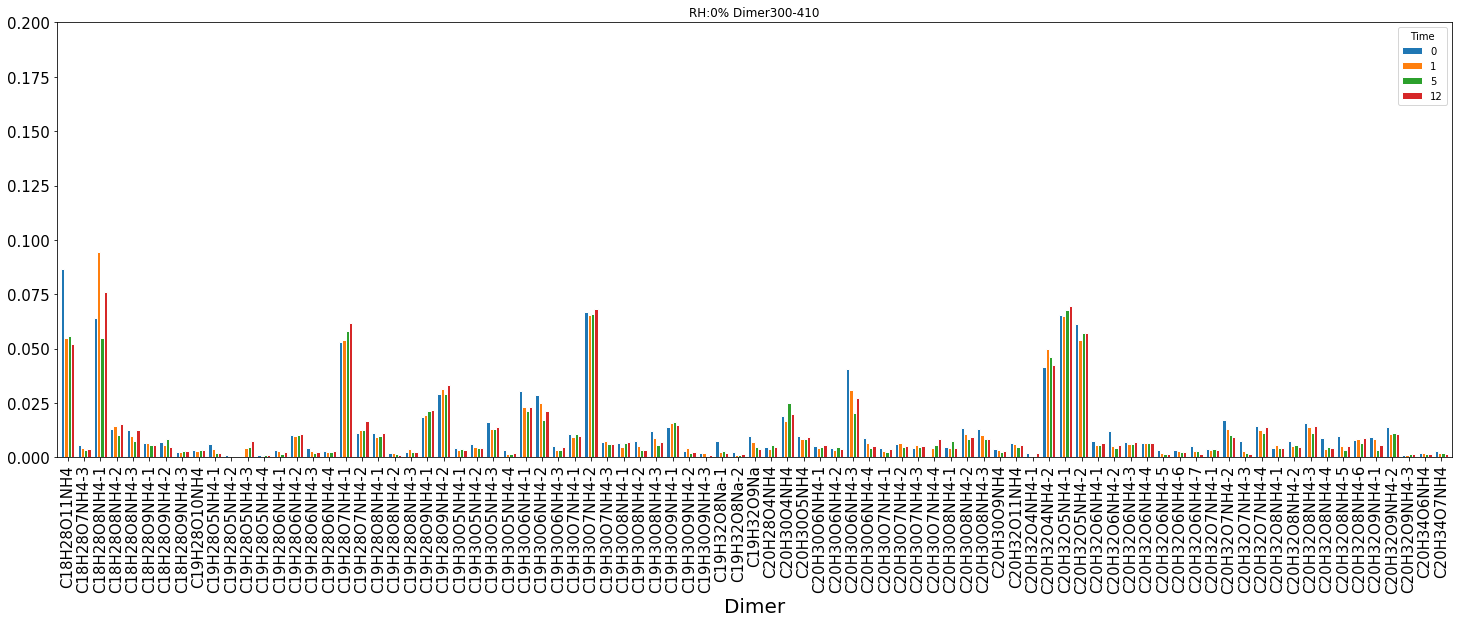

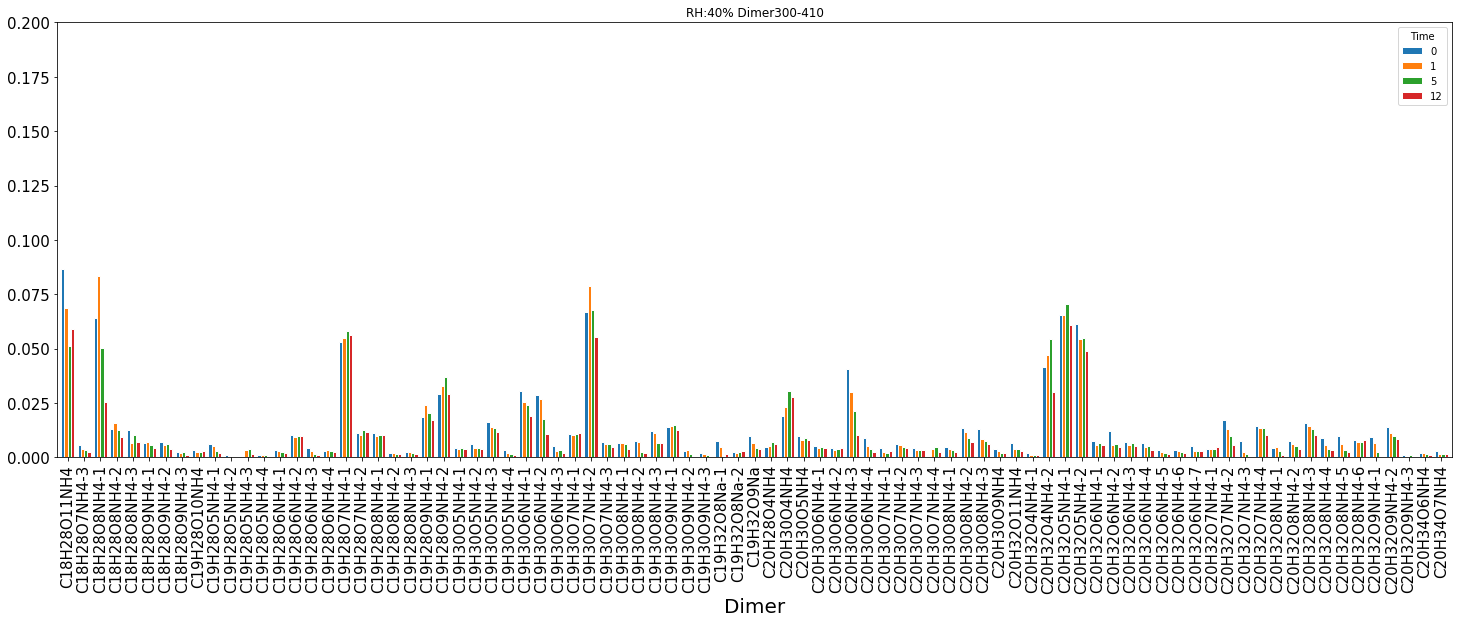

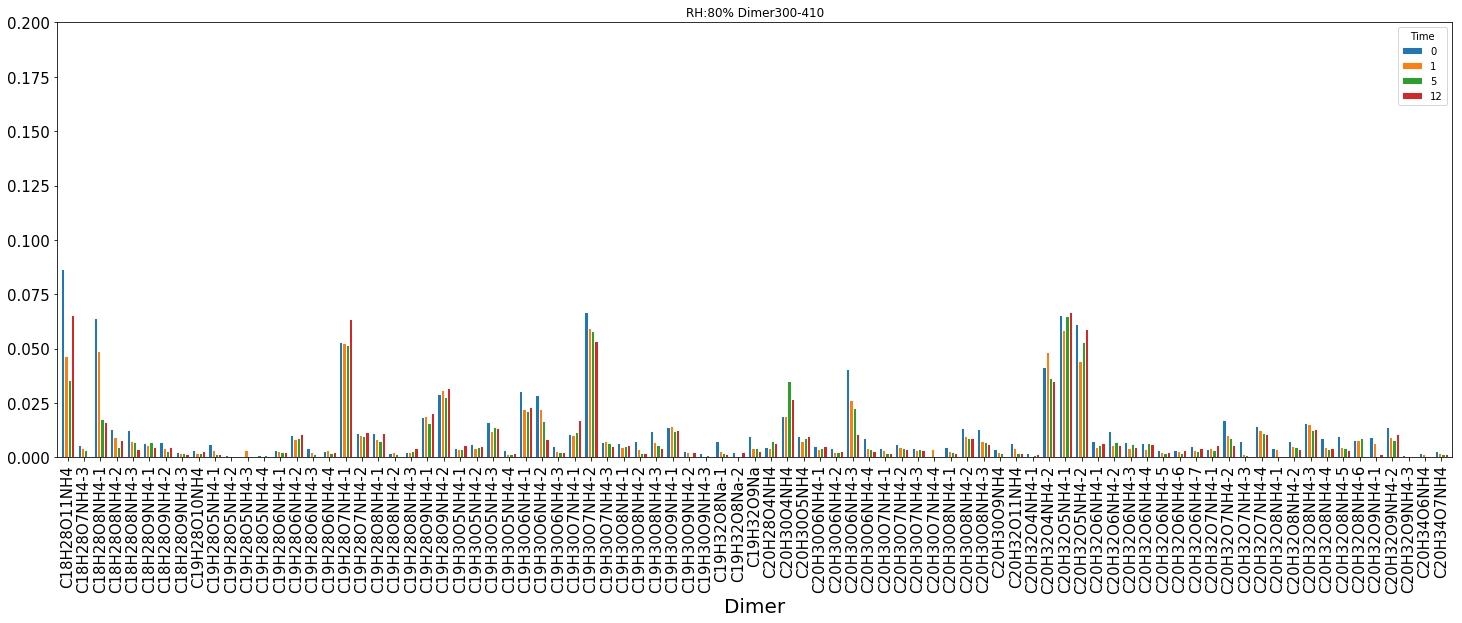

In [11]:
name_list=[0,100,200,300,410]
rh1=[0,40,80]
for i in range(4):
    left=name_list[i]
    right=name_list[i+1]
    data=pos[(pos['id']<=name_list[i+1])&(pos['id']>=name_list[i])]
    data=data[(data['Area_x']>=1000)&(data['Nol_Response']<=3)]
#     data=data[data['Nol_Response']<=3]
    
    for rh in rh1:
        #二聚体数据
        title1='RH:%s'%rh+'%'+' Dimer'+'%d-%d'%(left,right)
        data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
        data2=data2[data2['type']=='Dimer']
        data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
        plt.xlabel('Dimer',fontsize=20)
        plt.tick_params(labelsize=15)
        plt.ylim(0,0.2)
        plt.title(title1)
        # plt.xticks(fontsize=15)
        # add_datas=data[(data['RH']==0)&(data['Time']==0)]
        # y=add_datas['Nol_Response']
        # x=add_datas['Name']
        # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
        plt.show()
 

In [135]:
increase=pd.read_excel(r'H:\脱附实验\数据分析记录及思路.xlsx',sheetname='Sheet3')
increase.shape

(57, 4)

In [136]:
increase.head()

,RH0-increase,RH0-decrease,RH80-increase,RH80-decrease
0,C15H22O6Na-1,C15H24O4Na-2,C15H24O5Na-2,C15H24O4Na-2
1,C15H26O5Na-3,C19H28O5Na-1,C15H26O5Na-1,C15H24O7Na-2
2,C15H26O6Na-1,C20H32O4Na-4,C15H26O5Na-4,C15H26O6Na-2
3,C16H24O7Na-1,C19H28O5NH4-2,C15H26O6Na-1,C15H28O4Na-3
4,C16H26O5Na-4,C20H30O7NH4-4,C15H26O7Na-1,C16H26O8Na-2


In [133]:
pos_data.shape

(6591, 15)

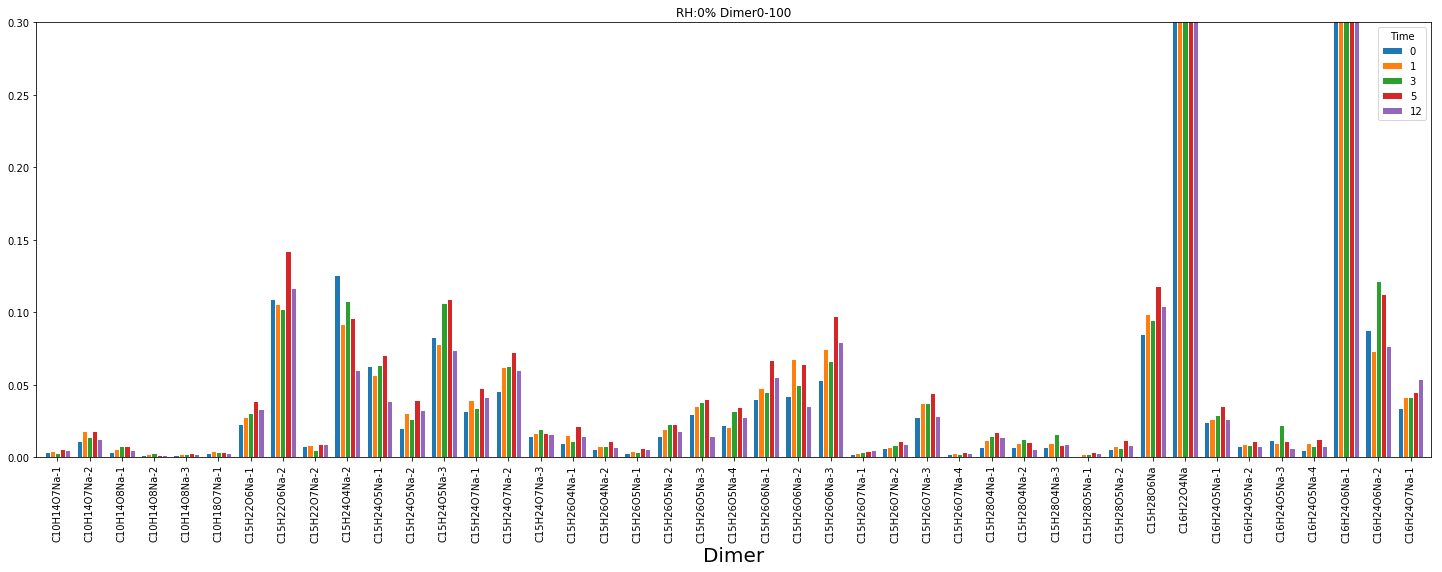

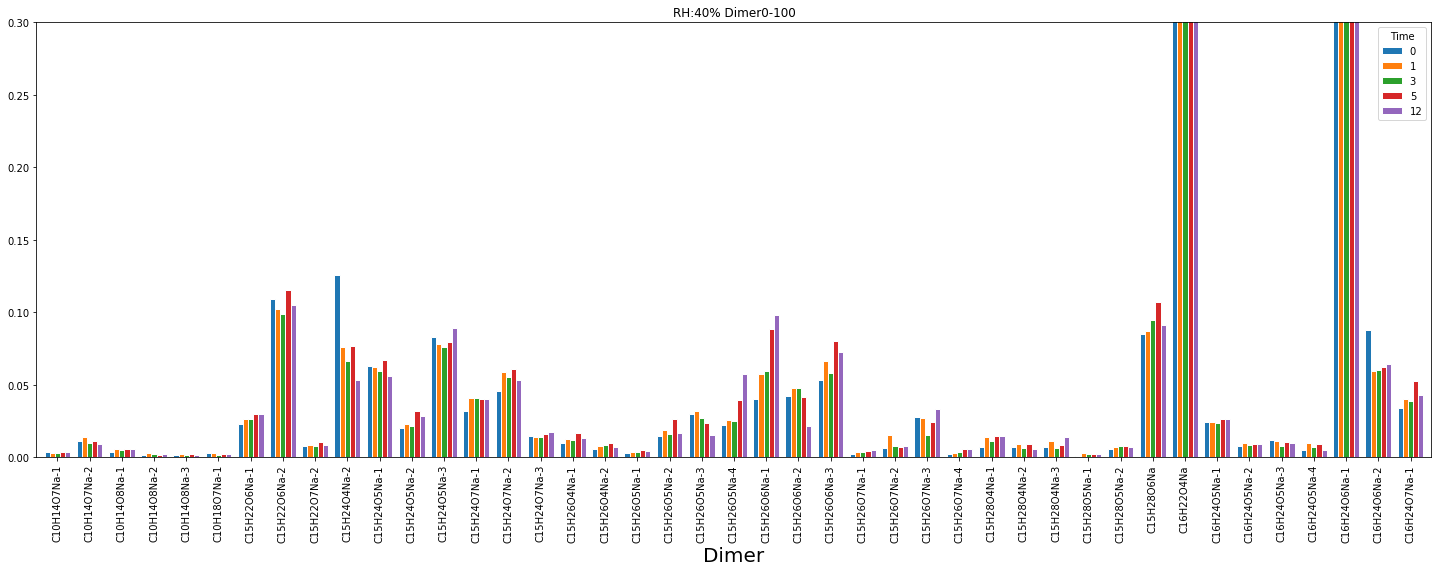

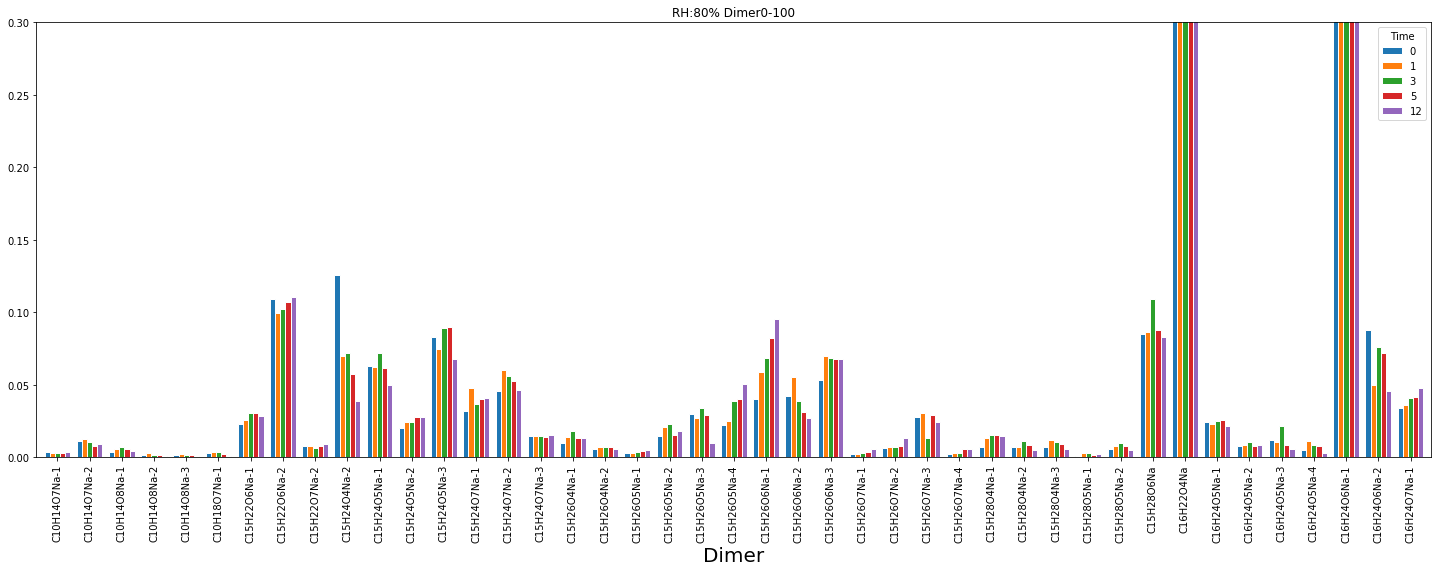

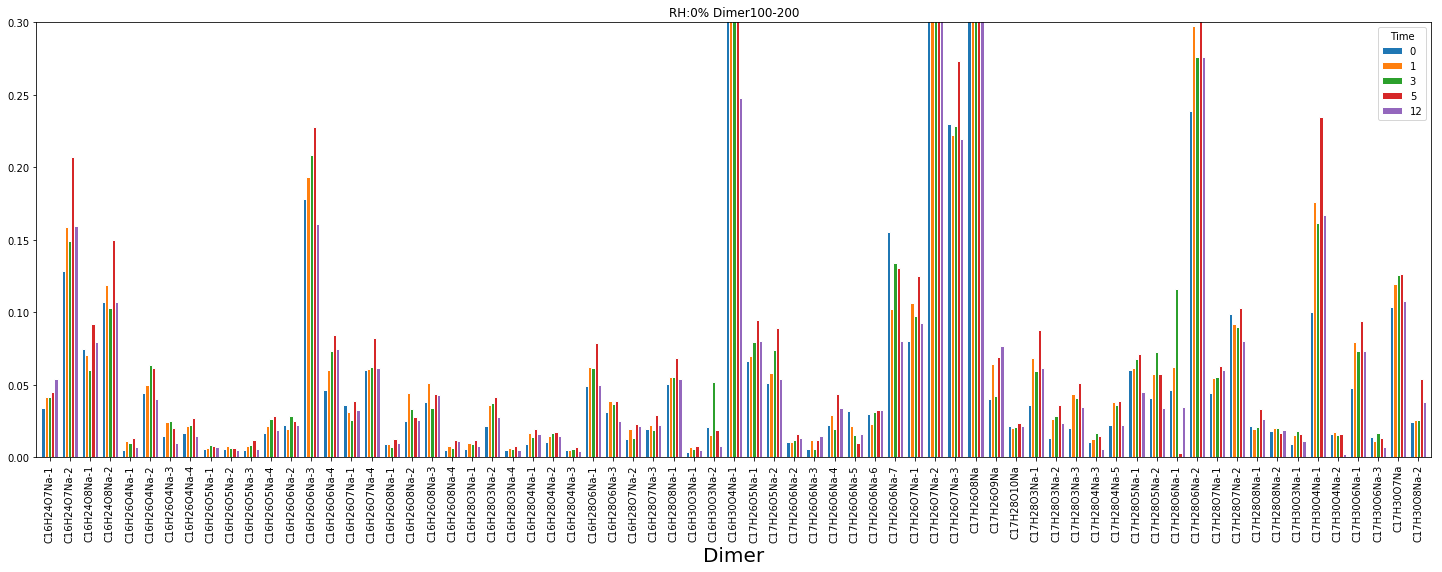

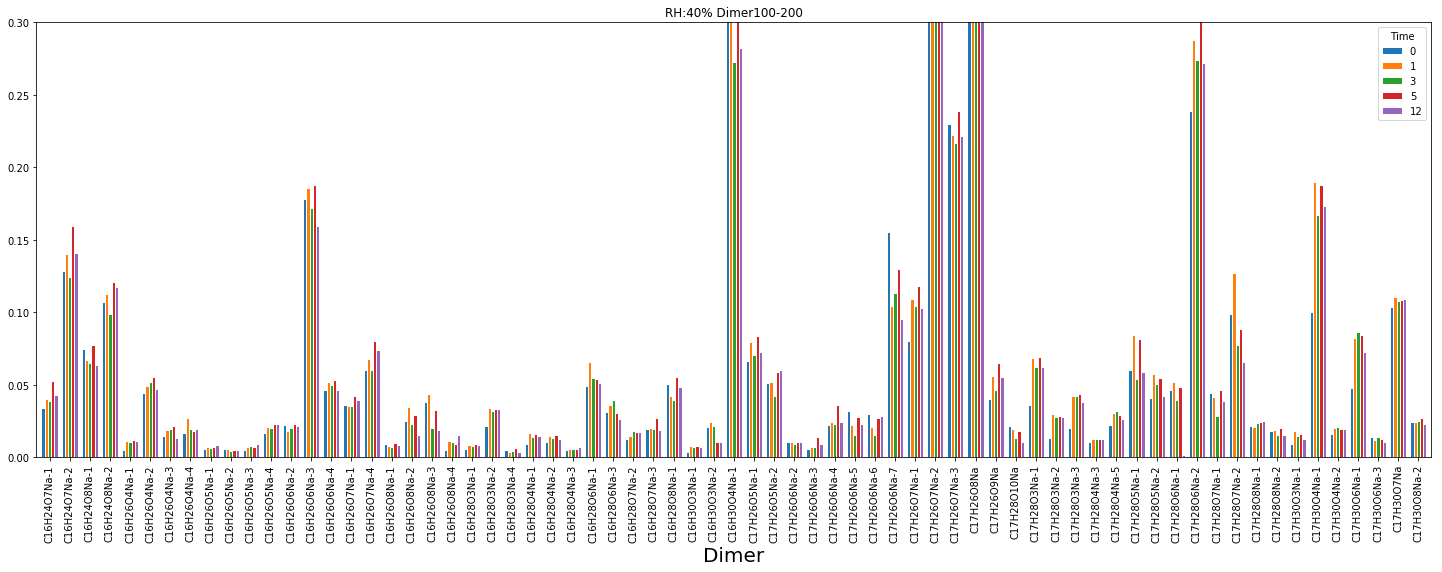

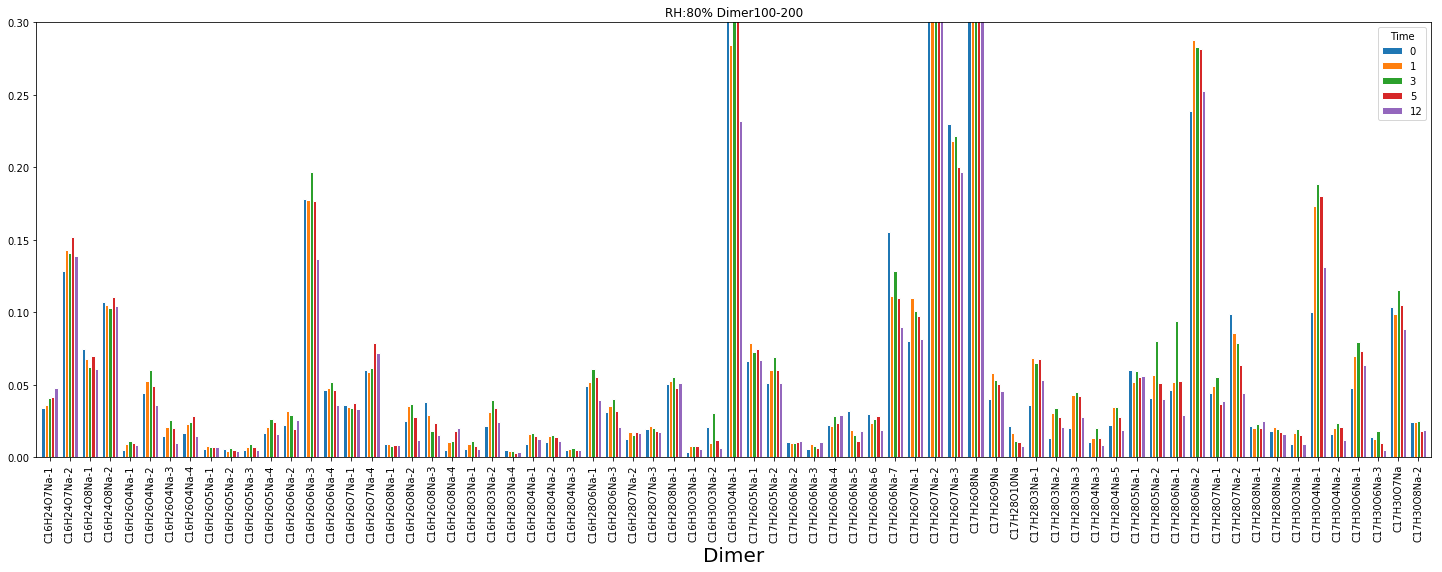

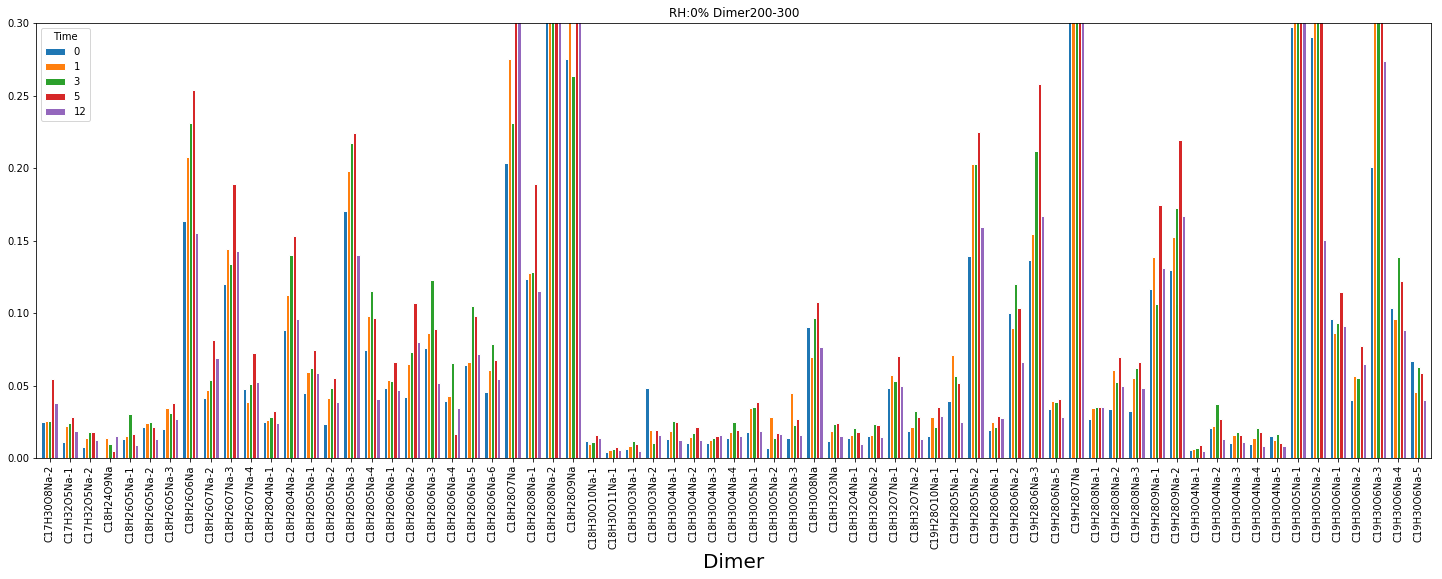

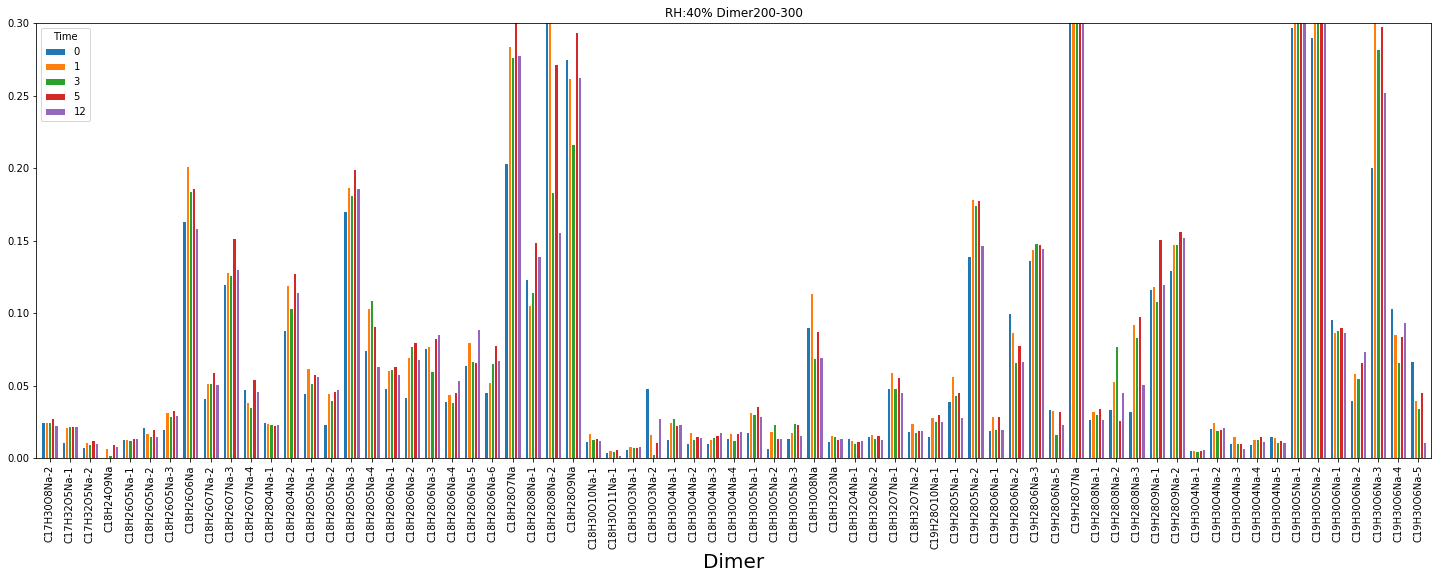

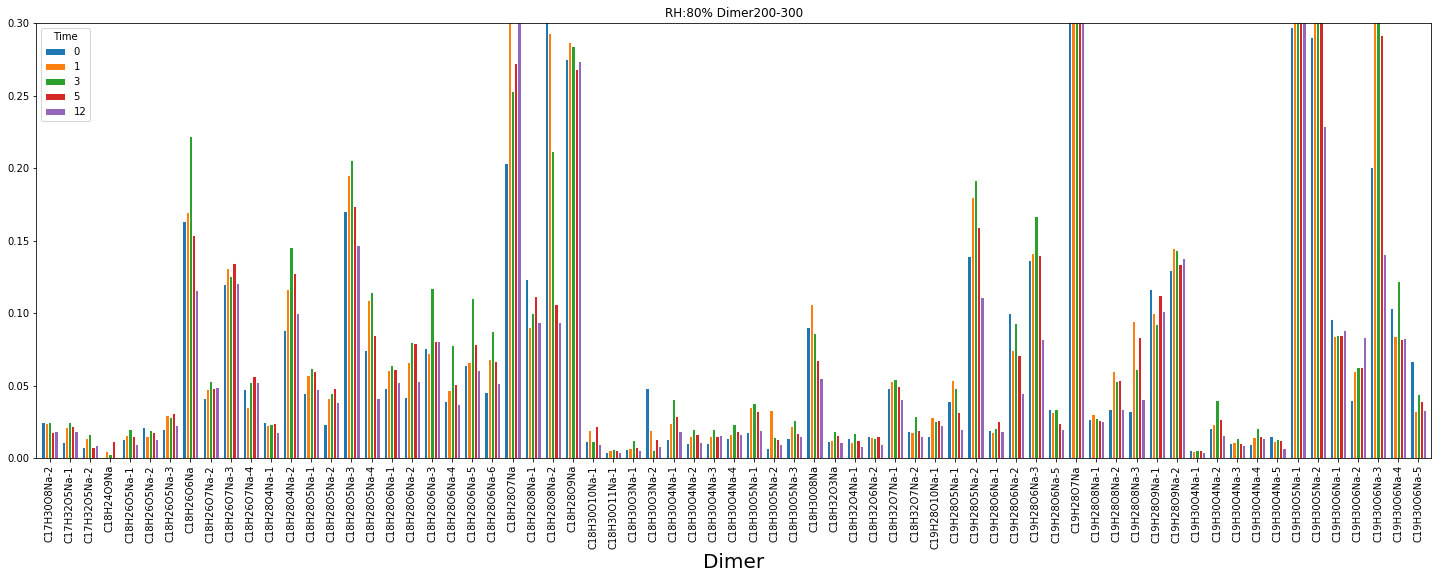

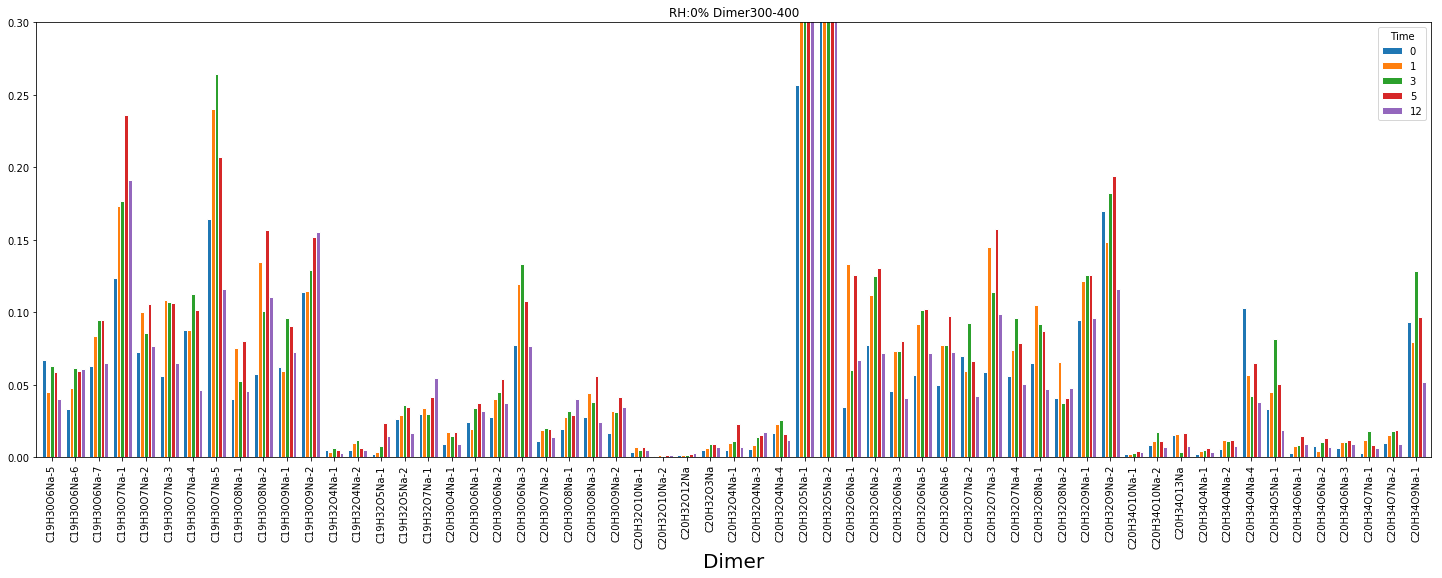

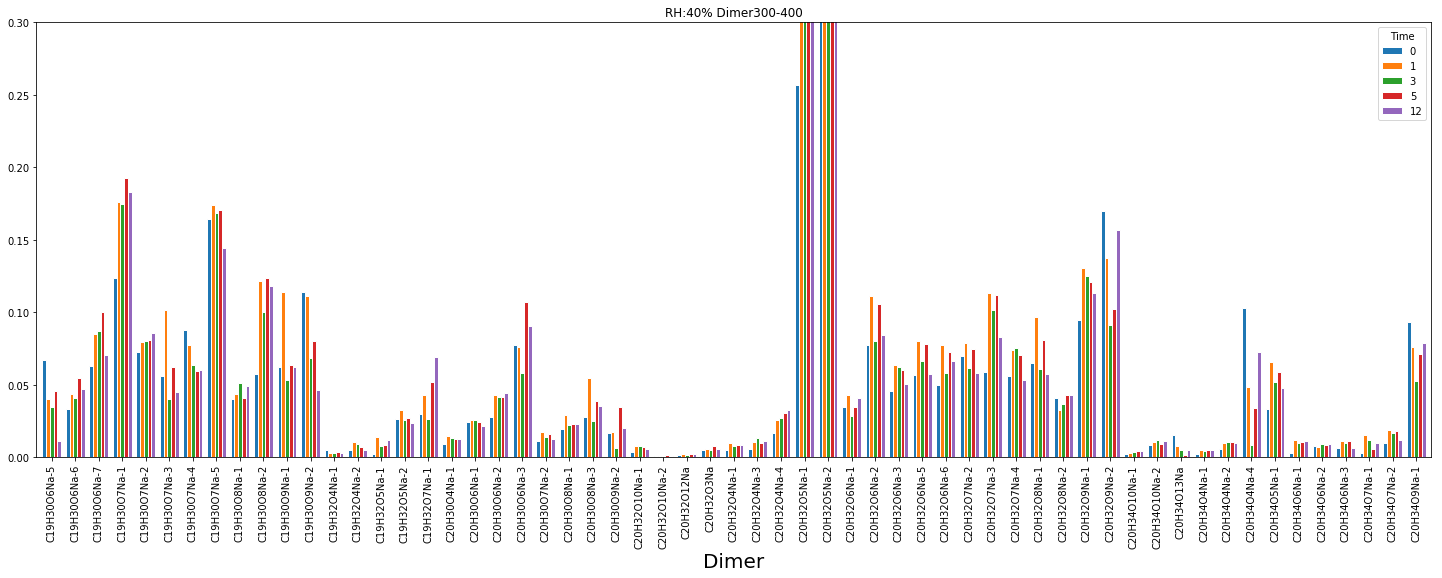

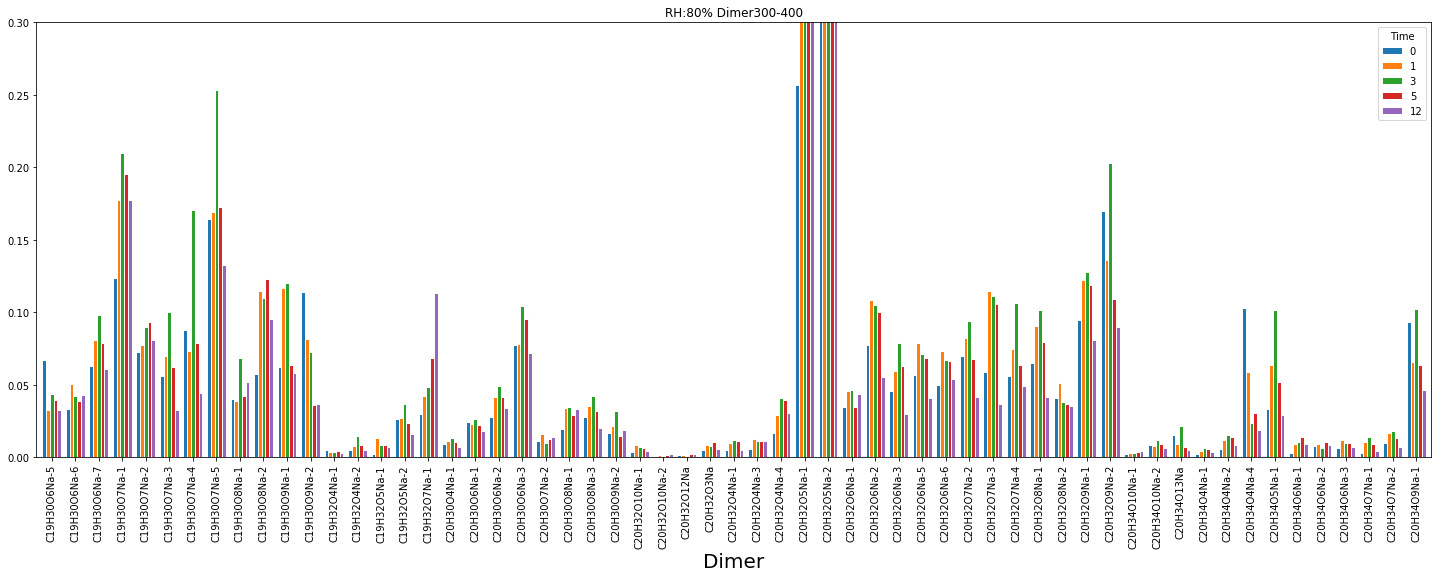

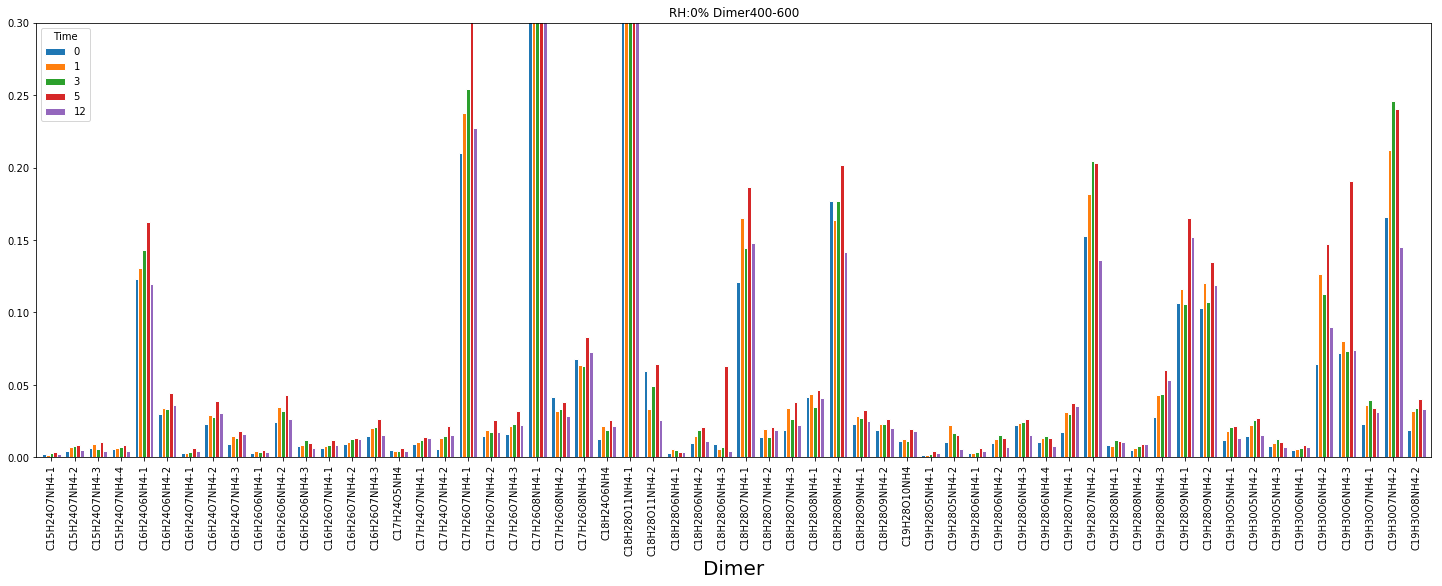

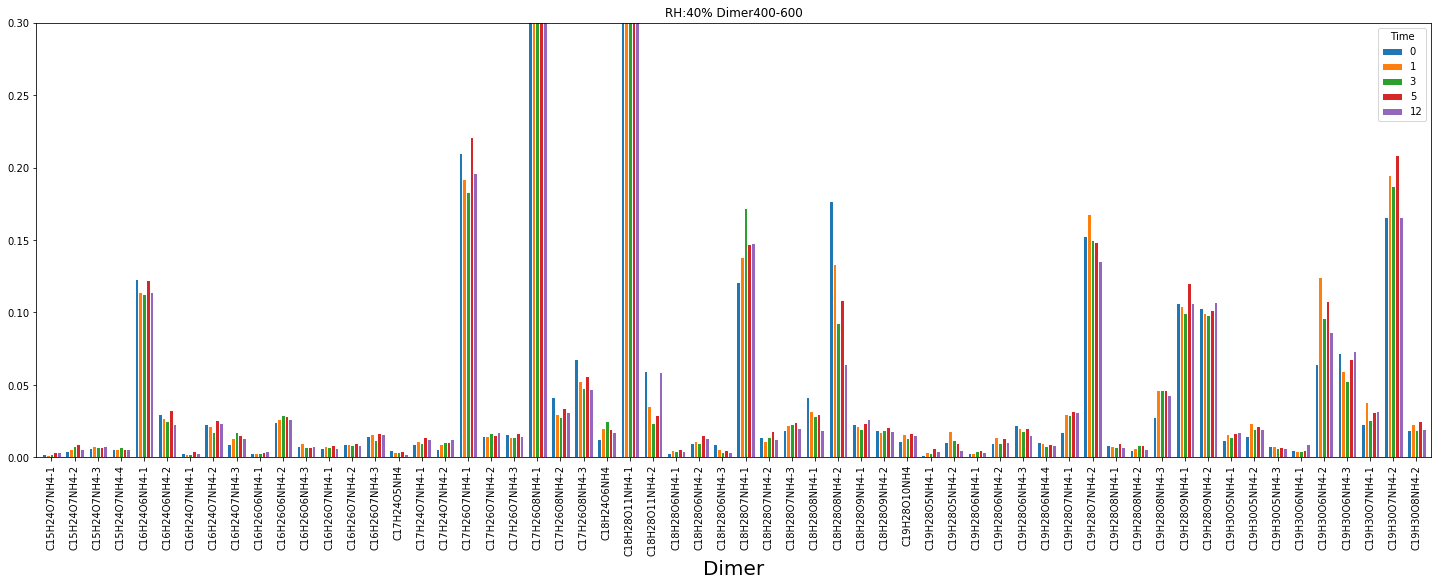

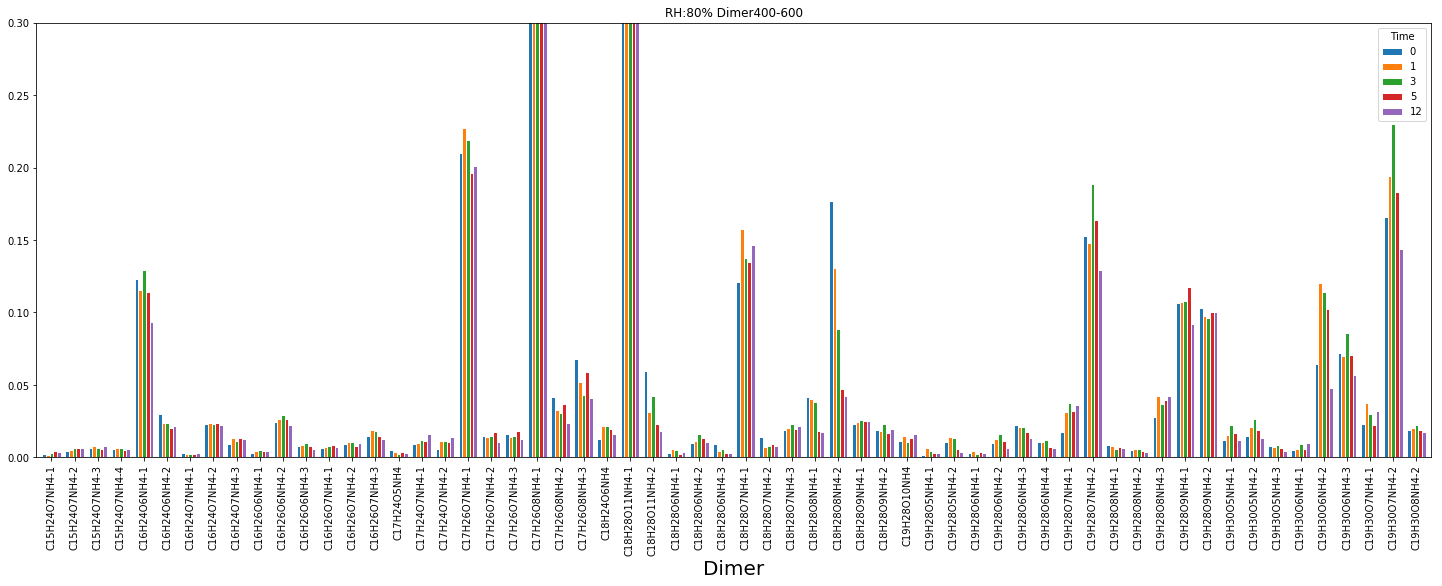

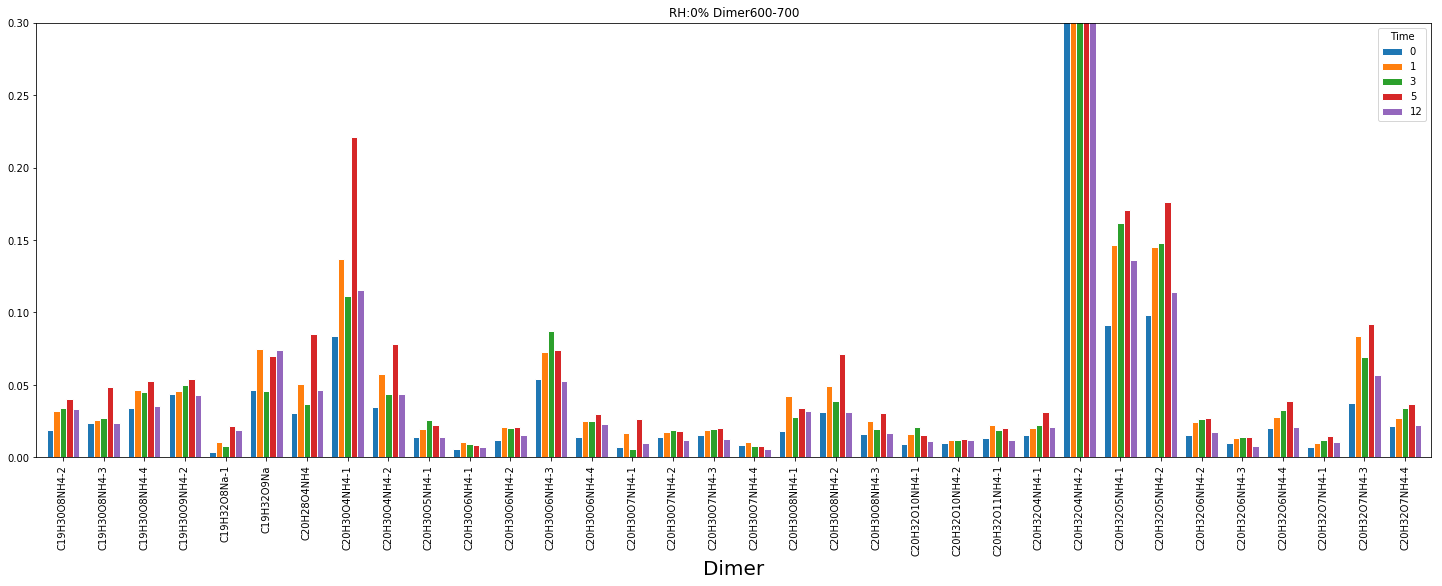

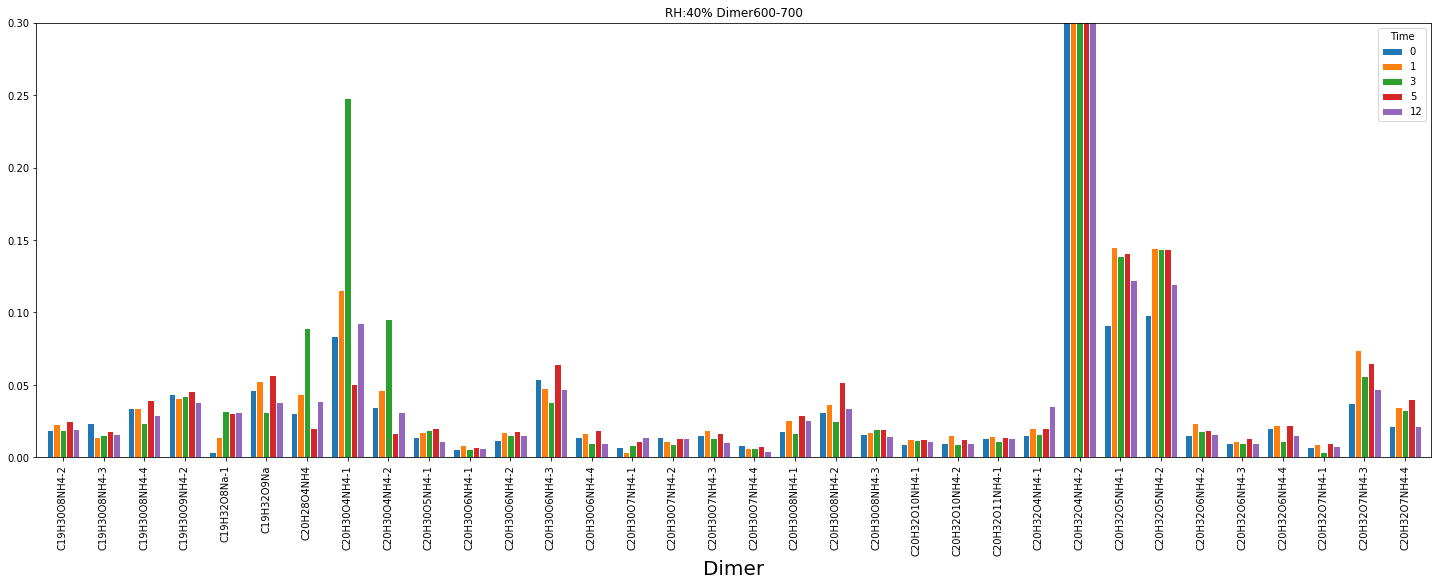

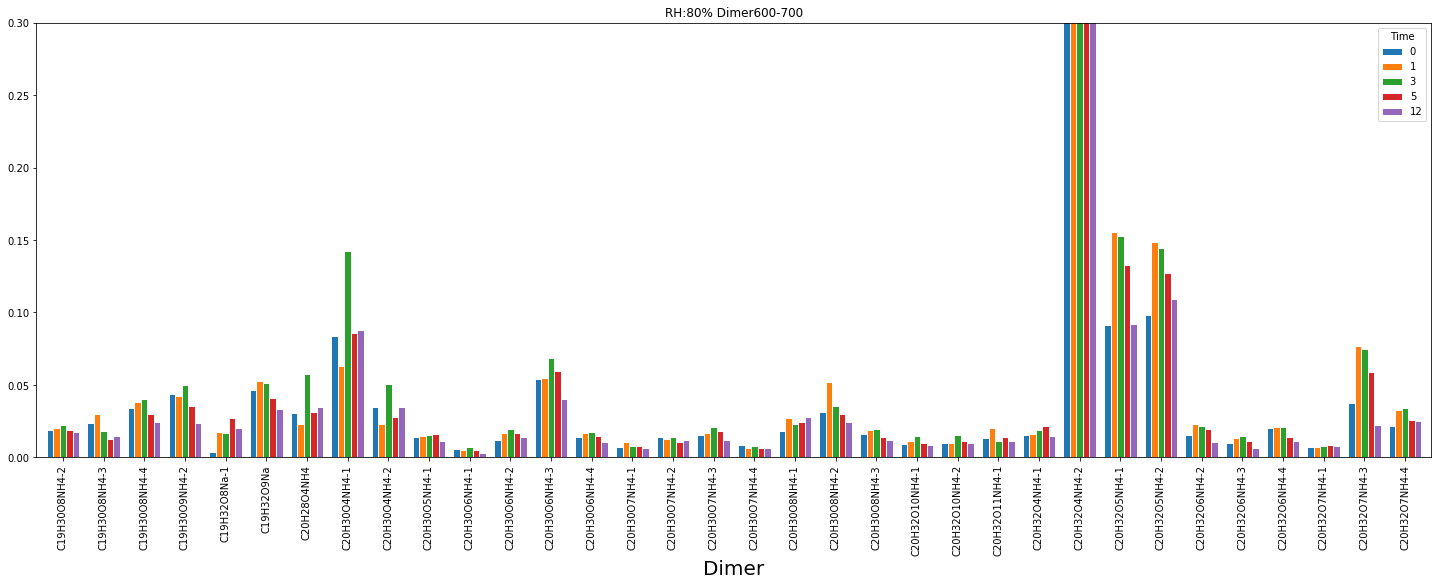

In [127]:
# pos_data_big=pos_data[pos_data['Area_x']>=2000]
# xianzhu=pos_data_big[pos_data_big['变化比例']>=0.5]
# 计算每种物质显著变化出现的次数
# count=xianzhu['Name'].value_counts()
# count_df=pd.DataFrame({'count':count})
# count_df=count_df.reset_index()
# count_df.head()
#赛选出计数大与5的物质清单(变化幅度大于0.5，且出现实验次数大于5)
# count_list='|'.join("%s" %x for x in count_df[count_df['count']>=4]['index'])
#从主表中赛选出变化显著的物质 主表 posdata
count_list='|'.join("%s" %x for x in increase['RH0-increase'])
data=pos_data[pos_data['Name'].str.contains(count_list, regex=True)==True]

#作图
rh1=[0,40,80]
# name_list=[0,100,200,300,400,600,700]
# for i in range(6):
#     left=name_list[i]
#     right=name_list[i+1]
#     data=pos_data[(pos_data['id']<=name_list[i+1])&(pos_data['id']>=name_list[i])]
#     data=data[(data['Area_x']>=4000)&(data['Nol_Response']<=3)]
#     data=data[data['Nol_Response']<=3]
    
for rh in rh1:
    #二聚体数据
    title1='RH:%s'%rh+'%'+' Dimer'+'%d-%d'%(left,right)
    data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data2[data2['type']=='Dimer']
    data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
    plt.xlabel('Dimer',fontsize=20)
    plt.ylim(0,0.3)
    plt.title(title1)
    # plt.xticks(fontsize=15)
    # add_datas=data[(data['RH']==0)&(data['Time']==0)]
    # y=add_datas['Nol_Response']
    # x=add_datas['Name']
    # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
    plt.show()


In [184]:
# lis=increase['RH0-decrease']
# lis2=increase['RH80-increase']
# lis=lis.c
lis=pd.concat([increase['RH0'],increase['RH80']],axis=0)
 

In [185]:
lis=lis.unique()

In [12]:
increase=pd.read_excel(r'E:\学位论文\第一次脱附试验-二聚体变化情况.xlsx')
increase.shape

(41, 4)

In [13]:
increase.head()

,RH0_Reduce,RH0_Increase,RH80_Reduce,RH80_Increase
0,C18H30O8Na,C17H26O8Na-2,C17H26O7Na-2,C17H26O8Na-2
1,C18H32O8Na-1,C18H28O6Na-3,C18H28O8Na-1,C18H28O6Na-3
2,C19H28O5Na-2,C19H28O7Na,C18H28O8Na-2,C19H30O6Na-1
3,C19H28O5Na-4,C19H28O9Na-1,C18H28O9Na,C19H30O8Na-2
4,C19H30O5Na-3,C19H28O9Na-2,C18H30O6,C17H26O8NH4-1


In [40]:
lis=increase['RH80_Increase']
lis=lis.unique()

In [177]:
neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 2118
Data columns (total 15 columns):
id              2119 non-null int64
Name            2119 non-null object
Trace           2119 non-null float64
RT              2119 non-null float64
Area_x          2119 non-null float64
Response        2119 non-null float64
RH_Time         2119 non-null int64
RH_Time_new     2119 non-null int64
type            2119 non-null object
RH              2119 non-null int64
Time            2119 non-null int64
Area_y          2119 non-null float64
Nol_Response    2119 non-null float64
对照实验            2119 non-null float64
变化比例            2119 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 264.9+ KB


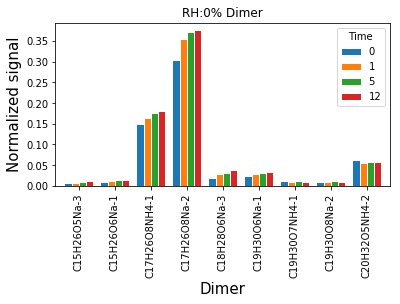

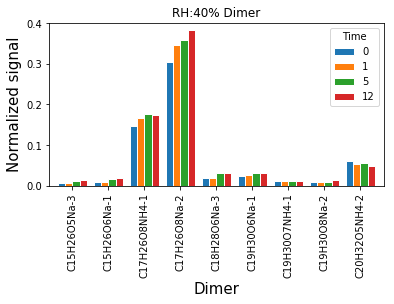

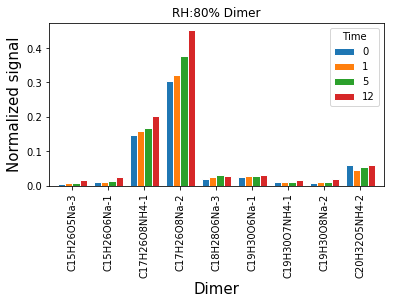

In [44]:
count_list='|'.join("%s" %x for x in lis)
data=pos[pos['Name'].str.contains(count_list, regex=True)==True]
rh1=[0,40,80]
for rh in rh1:
    #二聚体数据
    title1='RH:%s'%rh+'%'+' Dimer' 
    data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data2[data2['type']=='Dimer']
    data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(6, 3))
    plt.xlabel('Dimer',fontsize=15)
    plt.ylabel('Normalized signal',fontsize=15)
#     plt.ylim(0,0.1)
    plt.title(title1)
    # plt.xticks(fontsize=15)
    # add_datas=data[(data['RH']==0)&(data['Time']==0)]
    # y=add_datas['Nol_Response']
    # x=add_datas['Name']
    # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
    plt.show()

In [122]:
pos_data.head()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_y,Nol_Response,对照实验,变化比例
0,1,C10H14O4Na-1,221.0790,6.01,708.659,708.659,1,8012,Monomer,80,12,987050.5,0.000718,0.002851,-0.748210
1,2,C10H14O4Na-2,221.0790,6.54,15726.040,15726.040,1,8012,Monomer,80,12,987050.5,0.015932,0.010383,0.534485
2,3,C10H14O4Na-3,221.0790,7.29,3091.361,3091.361,1,8012,Monomer,80,12,987050.5,0.003132,0.007137,-0.561146
3,4,C10H14O4Na-4,221.0790,7.73,1456.859,1456.859,1,8012,Monomer,80,12,987050.5,0.001476,0.006942,-0.787391
4,5,C10H14O5Na-1,237.0739,6.11,12751.155,12751.155,1,8012,Monomer,80,12,987050.5,0.012918,0.009573,0.349424


In [ ]:
for rh in rh1:
    #二聚体数据
    title1='RH:%s'%rh+'%'+' Dimer'
    
    data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data2[data2['type']=='Dimer']
    data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
    plt.xlabel('Dimer',fontsize=20)
    plt.title(title1)
    # plt.xticks(fontsize=15)
    # add_datas=data[(data['RH']==0)&(data['Time']==0)]
    # y=add_datas['Nol_Response']
    # x=add_datas['Name']
    # plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
    plt.show()
for rh in rh1:
    单体数据
    title2='RH:%s'%rh+'%'+' Monomer'
    data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
    data2=data2[data2['type']=='Monomer']
    data2=data2[data2['Nol_Response']<=0.07]
    data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
    bax = brokenaxes(ylims=((0.1, .2), (.3, 0.4)), hspace=.1)
    plt.xlabel('Monomer',fontsize=20)
    plt.title(title2)
    plt.xticks(fontsize=15)
    plt.show()

In [112]:
pos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5890 entries, 1 to 6590
Data columns (total 15 columns):
id             5890 non-null int64
Name           5890 non-null object
Trace          5890 non-null float64
RT             5890 non-null float64
Area_x_x       5890 non-null float64
Response       5890 non-null float64
RH_Time        5890 non-null int64
RH_Time_new    5890 non-null int64
type           5890 non-null object
RH             5890 non-null int64
Time           5890 non-null int64
Area_x_y       5890 non-null float64
总信号占比          5890 non-null float64
对照实验           5890 non-null float64
变化比例           5890 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 736.2+ KB


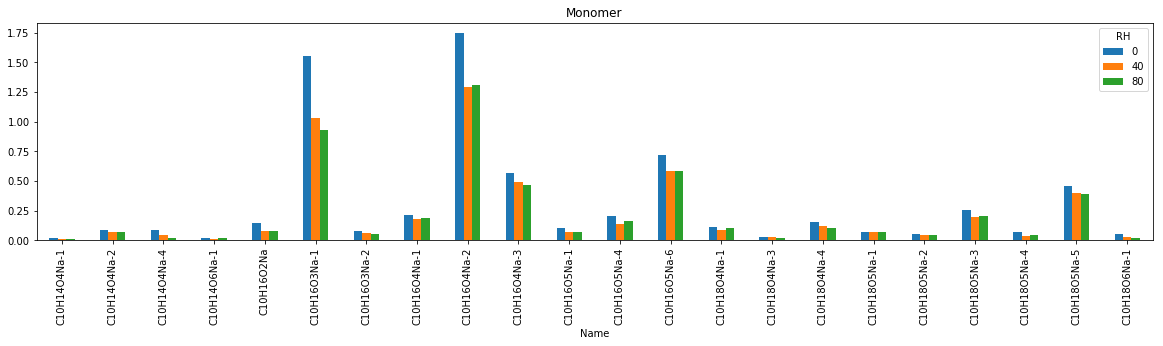

In [19]:
# 计算每种物质显著变化出现的次数
count=xianzhu_posdata['Name'].value_counts()
count_df=pd.DataFrame({'count':count})
count_df=count_df.reset_index()
count_df.head()

,index,count
0,C16H28O7Na-1,12
1,C10H18O8Na-3,12
2,C10H18O4Na-1,12
3,C10H16O4Na-1,12
4,C17H32O5Na-1,12


In [25]:
count_df['count'].value_counts()

1     38
2     35
4     17
5     13
3     13
8     12
6     12
12     8
11     8
10     8
9      6
7      2
Name: count, dtype: int64

In [20]:
count_df.columns=['Name','count']
count_df.head()

,Name,count
0,C16H28O7Na-1,12
1,C10H18O8Na-3,12
2,C10H18O4Na-1,12
3,C10H16O4Na-1,12
4,C17H32O5Na-1,12


In [21]:
#赛选出计数大与5的物质清单(变化幅度大于0.5，且出现实验次数大于5)
count_list='|'.join("%s" %x for x in count_df[count_df['count']>=4]['Name'])


In [31]:
#从主表中赛选出变化显著的物质 主表 posdata
data=pos[pos['Name'].str.contains(count_list, regex=True)==True]
data.shape#count_list 为87

(1118, 15)

In [19]:
data=xianzhu_posdata[变化比例]

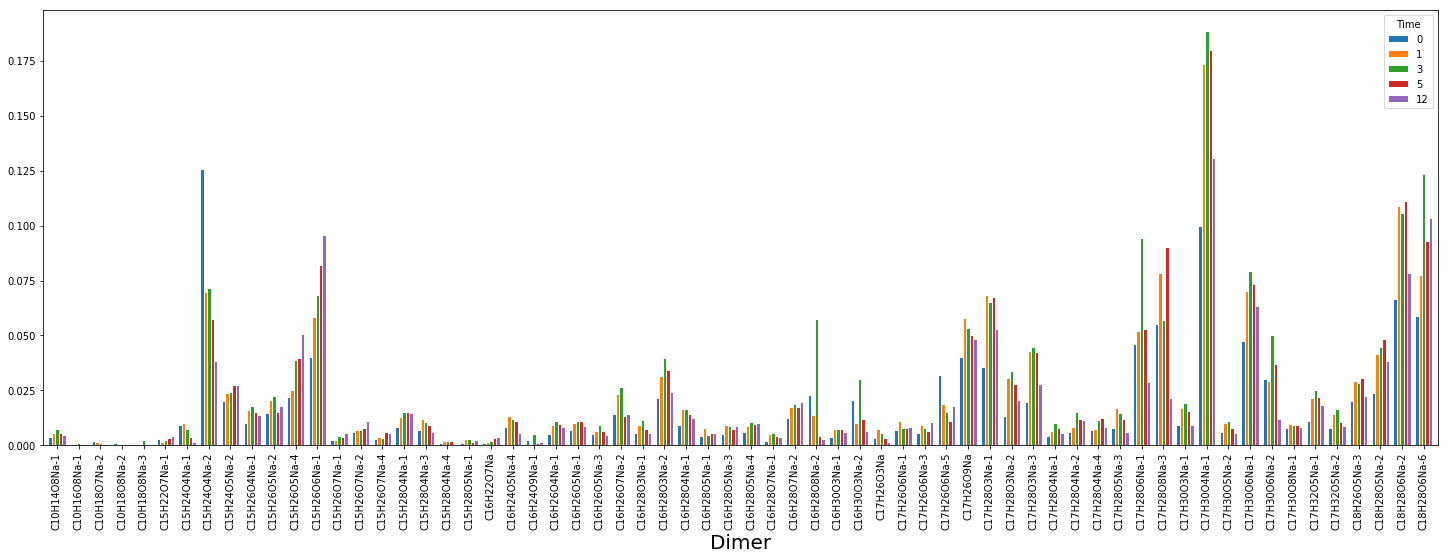

In [36]:
#二聚体数据
data2=data[(data['RH']==80)|(data['RH']==0)&(data['Time']==0)]
data2=data2[data2['type']=='Dimer']
data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
plt.xlabel('Dimer',fontsize=20)
# plt.xticks(fontsize=15)
# add_datas=data[(data['RH']==0)&(data['Time']==0)]
# y=add_datas['Nol_Response']
# x=add_datas['Name']
# plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
plt.show()

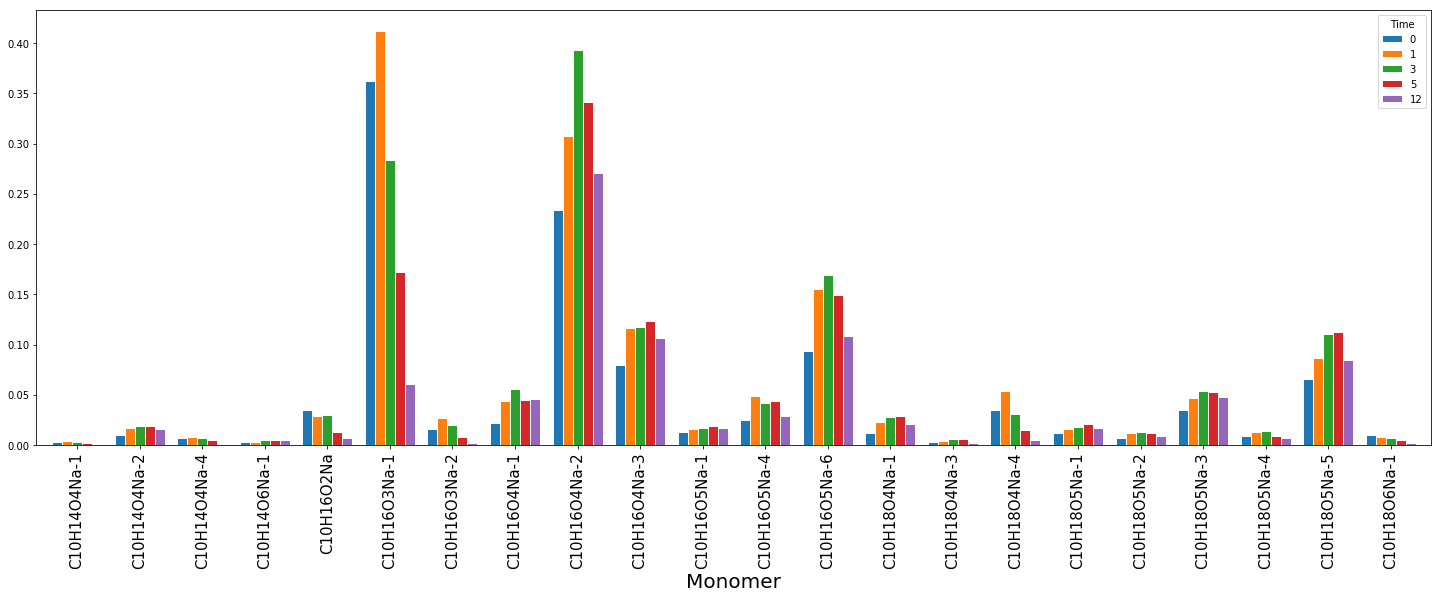

In [37]:
#单体数据
data2=data[(data['RH']==80)|(data['RH']==0)&(data['Time']==0)]
data2=data2[data2['type']=='Monomer']
# data2=data2[data2['Nol_Response']<=0.07]
data2.groupby(by=['Name','Time'])['Nol_Response'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
# bax = brokenaxes(ylims=((0.1, .2), (.3, 0.4)), hspace=.1)
plt.xlabel('Monomer',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

# 看相对变化
## 正离子数据看相对变化


In [101]:
posdata.head(10)

id          Name     Trace     RT        Area    Response  \
RH_Time                                                                   
0       0      1  C10H16O3Na-1  207.0997   7.23  124915.656  124915.656   
        3990   1  C17H30O6Na-2  353.1940   9.09    1669.880    1669.880   
        1      2  C10H16O3Na-2  207.0997   9.55    2403.975    2403.975   
        3991   2  C17H30O6Na-3  353.1940   9.21    6383.839    6383.839   
        2      3  C10H16O4Na-1  223.0946   5.62   90454.133   90454.133   
        3992   3  C18H28O6Na-6  363.1784   9.58    6252.858    6252.858   
        3      4  C10H16O4Na-2  223.0946   5.85   22263.777   22263.777   
        3993   4  C18H28O6Na-7  363.1784  10.00    4549.630    4549.630   
        4      5  C10H16O4Na-3  223.0946   8.13   16465.617   16465.617   
        3994   5   C7H12O5Na-1  199.0582   3.49    2684.424    2684.424   

              RH_Time  C17H26O8Na-2  Nol_Response     type  RH  Time  \
RH_Time                                                                
0       0           0    293282.594      0.425923  Monomer   0     0   
        3990        0    293282.594      0.005694    Dimer   0     0   
        1           0    293282.594      0.008197  Monomer   0     0   
        3991        0    293282.594      0.021767    Dimer   0     0   
        2           0    293282.594      0.308420  Monomer   0     0   
        3992        0    293282.594      0.021320    Dimer   0     0   
        3           0    293282.594      0.075912  Monomer   0     0   
        3993        0    293282.594      0.015513    Dimer   0     0   
        4           0    293282.594      0.056142  Monomer   0     0   
        3994        0    293282.594      0.009153  Monomer   0     0   

                  对照实验  变化比例  
RH_Time                       
0       0     0.425923   0.0  
        3990  0.005694   0.0  
        1     0.008197   0.0  
        3991  0.021767   0.0  
        2     0.308420   0.0  
        3992  0.021320   0.0  
        3     0.075912   0.0  
        3993  0.015513   0.0  
        4     0.056142   0.0  
        3994  0.009153   0.0

In [14]:
#取干态条件为对比数据,
duizao=posdata[posdata['Time']==0]['对照实验']
duizao_data=list(duizao)*13
posdata['干态信号']=duizao_data
posdata['相对比例']=posdata['Nol_Response']/posdata['干态信号']
posdata.tail()

,id,Name,Trace,RT,Area_x,Response,RH_Time,RH_Time_new,type,RH,Time,Area_y,Nol_Response,对照实验,变化比例,干态信号,相对比例
2881,225,C18H28O6Na-2,363.1784,9.79,38612.504,38612.504,13,0,Dimer,0,0,581401.188,0.066413,0.066413,0.0,0.066413,1.0
2882,226,C18H28O6Na-3,363.1784,9.96,57095.691,57095.691,13,0,Dimer,0,0,581401.188,0.098204,0.098204,0.0,0.098204,1.0
2883,227,C18H28O6Na-4,363.1784,10.20,23030.572,23030.572,13,0,Dimer,0,0,581401.188,0.039612,0.039612,0.0,0.039612,1.0
2884,228,C18H28O6Na-5,363.1784,10.41,37520.313,37520.313,13,0,Dimer,0,0,581401.188,0.064534,0.064534,0.0,0.064534,1.0
2885,229,C18H28O6Na-6,363.1784,10.57,34236.430,34236.430,13,0,Dimer,0,0,581401.188,0.058886,0.058886,0.0,0.058886,1.0


In [113]:
posdata['相对比例']=posdata['Nol_Response']/posdata['干态信号']
posdata.tail()

id          Name     Trace    RT       Area   Response  \
RH_Time                                                                 
8012    3985  402    C10H15O3-2  183.1021  5.65  13900.248  13900.248   
        3986  403    C10H15O3-3  183.1021  6.40  75318.883  75318.883   
        3987  404  C19H32O8Na-1  411.1995  8.83   1184.380   1184.380   
        3988  405  C19H32O8Na-2  411.1995  7.43   2174.717   2174.717   
        3989  406    C19H32O9Na  427.1944  8.53   3938.648   3938.648   

              RH_Time  C17H26O8Na-2  Nol_Response     type  RH  Time  \
RH_Time                                                                
8012    3985     8012     378525.25      0.036722  Monomer  80    12   
        3986     8012     378525.25      0.198980  Monomer  80    12   
        3987     8012     378525.25      0.003129    Dimer  80    12   
        3988     8012     378525.25      0.005745    Dimer  80    12   
        3989     8012     378525.25      0.010405    Dimer  80    12   

                  对照实验      变化比例      干态信号      相对比例  
RH_Time                                               
8012    3985  0.056249 -0.347156  0.056249  0.652844  
        3986  0.240460 -0.172503  0.240460  0.827497  
        3987  0.024094 -0.870135  0.024094  0.129865  
        3988  0.008002 -0.282052  0.008002  0.717948  
        3989  0.039714 -0.737995  0.039714  0.262005

In [22]:
#从主表中赛选出变化显著的物质 主表 posdata
data=posdata[posdata['Name'].str.contains(count_list, regex=True)==True]
data.shape#count_list 为87

(1118, 17)

In [23]:
data['相对比例'].value_counts()

1.000000    86
1.905033     1
1.981298     1
2.670472     1
1.115976     1
1.500574     1
0.510295     1
1.410491     1
2.615615     1
1.549297     1
1.597988     1
0.200880     1
1.613488     1
1.716006     1
1.985995     1
1.632329     1
1.327414     1
2.103404     1
0.866235     1
1.030273     1
1.272997     1
2.072153     1
0.768883     1
1.183626     1
1.016475     1
0.896921     1
1.248215     1
1.125389     1
0.078294     1
0.890955     1
            ..
1.043609     1
1.294693     1
2.940170     1
1.276679     1
1.916741     1
1.631833     1
1.656968     1
3.061625     1
2.146617     1
1.971215     1
2.167379     1
1.140235     1
0.750905     1
1.302593     1
1.033141     1
1.328897     1
1.901268     1
0.896964     1
3.112941     1
1.508602     1
1.120201     1
1.457146     1
1.914739     1
1.196340     1
1.817350     1
0.347198     1
1.664129     1
1.834276     1
2.008040     1
2.215429     1
Name: 相对比例, Length: 1033, dtype: int64

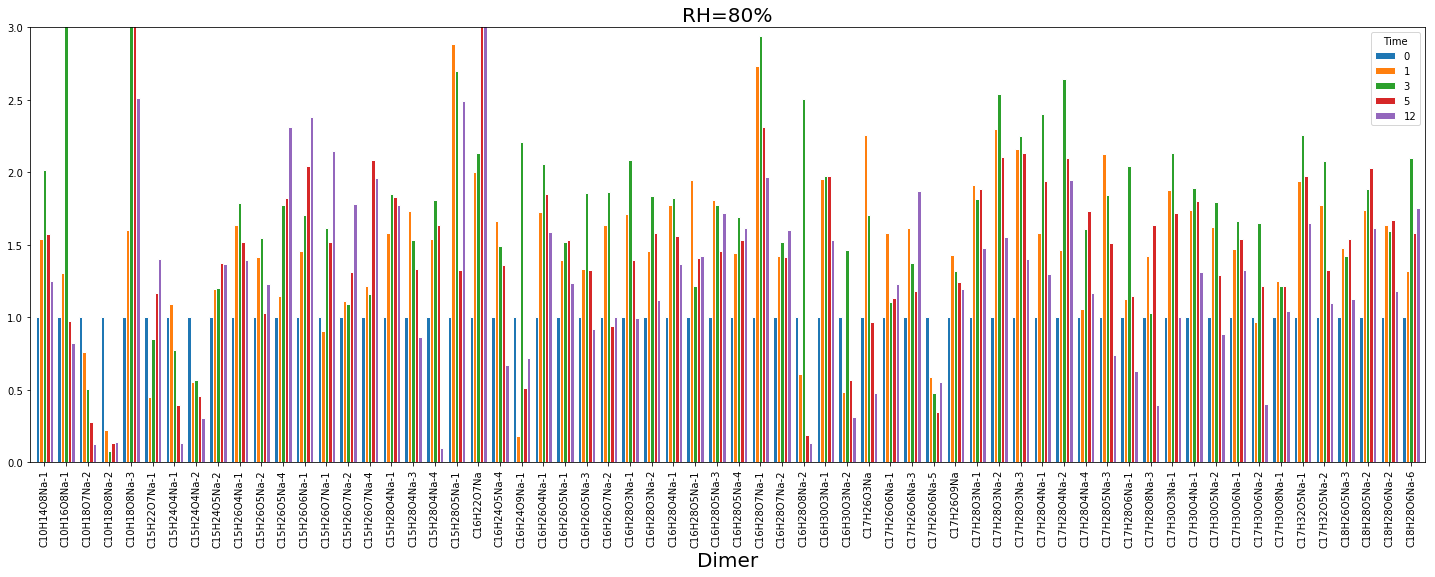

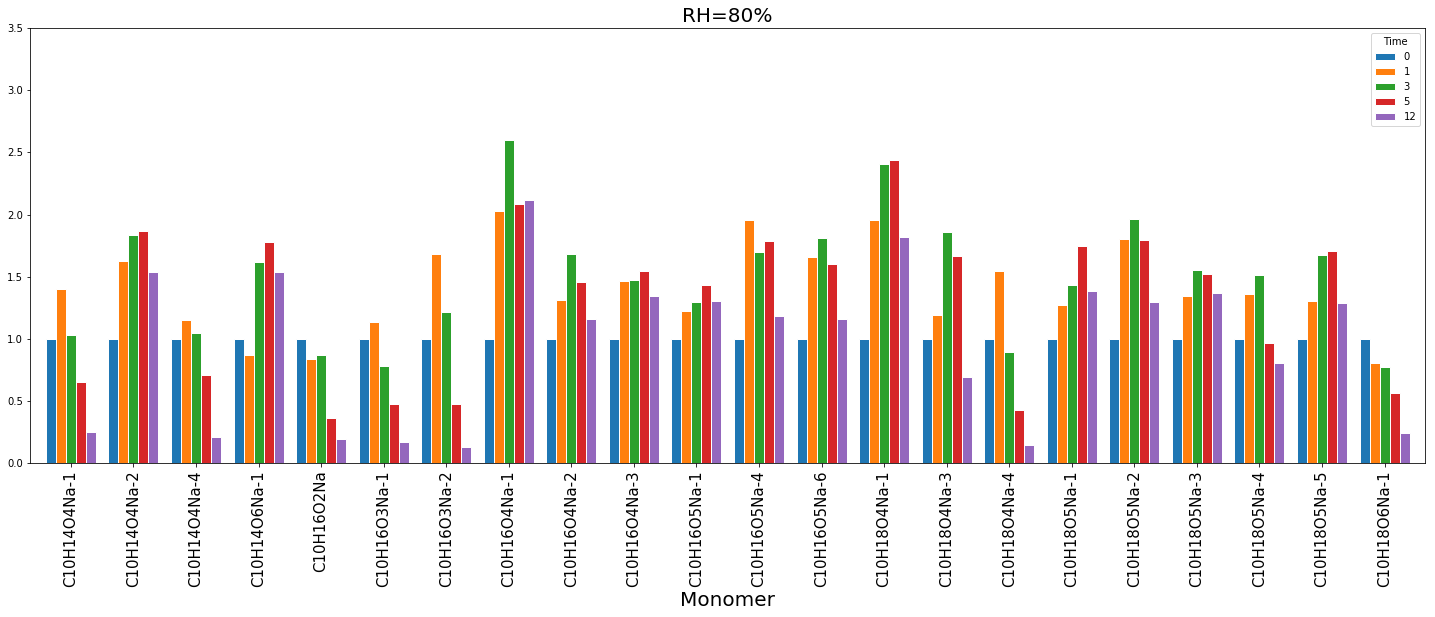

In [31]:
#二聚体数据
rh=80
# data2=data[data['RH']==rh]
data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
up_data=data2[data2['type']=='Dimer']
#浓度上升
# up_data=data2[data2['变化比例']<=2]
#浓度下降
# down_data=data2[data2['变化比例']<=0]
# data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
# data2=data[data['相对比例']<=2]

up_data.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
plt.ylim(0,3)
plt.xlabel('Dimer',fontsize=20)
plt.title('RH=%s'%rh +'%',fontsize=20)
# plt.xticks(fontsize=15)
# add_datas=data[(data['RH']==0)&(data['Time']==0)]
# y=add_datas['Nol_Response']
# x=add_datas['Name']
# plt.bar(x,y,alpha=0.9, width = 0.35, facecolor = 'red', edgecolor = 'white', label='0', lw=1)
plt.show()
# down_data.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(20, 4))
# plt.xlabel('Dimer',fontsize=20)
# plt.title('RH=%s'%rh +'%',fontsize=20)
# plt.show()
#单体数据
data2=data[(data['RH']==rh)|(data['RH']==0)&(data['Time']==0)]
data2=data2[data2['type']=='Monomer']
data2.groupby(by=['Name','Time'])['相对比例'].sum().unstack().plot(kind='bar', width=0.8,edgecolor = 'white',lw=1,figsize=(25, 8))
# bax = brokenaxes(ylims=((0.1, .2), (.3, 0.4)), hspace=.1)
plt.xlabel('Monomer',fontsize=20)
plt.ylim(0,3.5)
plt.xticks(fontsize=15)
plt.title('RH=%s'%rh+'%',fontsize=20)
plt.show()